
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the GitHub installation (Option C).

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [1]:

import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import polsartools as pst


In [2]:
""" 

Function to display images

"""

def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax

    num_images = len(filenames)

    if num_images == 1:
        # Single image case
        data = pst.read_rst(filenames[0])
        data[data==0]=np.nan
        vmin, vmax = compute_vmin_vmax(data)

        fig, ax = plt.subplots(figsize=(6, 6))
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filenames[0]))
        fig.colorbar(im, ax=ax)
        plt.tight_layout()
        plt.show()
    else:
        # Multiple image case
        ncols = min(max_cols, num_images)
        nrows = int(np.ceil(num_images / ncols))

        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
        axes = np.array(axes).reshape(-1)  # Flatten in case it's a 2D grid

        for i, filename in enumerate(filenames):
            data = pst.read_rst(filename)
            data[data==0]=np.nan
            vmin, vmax = compute_vmin_vmax(data)
            ax = axes[i]
            im = ax.imshow(data, vmin=vmin, vmax=vmax)
            ax.set_title(os.path.basename(filename))
            fig.colorbar(im, ax=ax)

        for j in range(num_images, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


## Extract polarimetric C3/T3 matrix from UAVSAR GRD data
#### Provide path to the UAVSAR annotation file. Make sure that extracted data and ``*.ann`` file are in the same folder

The sample dataset used in this tutorial can be downloaded from the following URL with NASA-Earthdata credentials: 
https://uavsar.asf.alaska.edu/UA_winnip_31606_12049_004_120627_L090_CX_03/winnip_31606_12049_004_120627_L090_CX_03_grd.zip

In [3]:

annFile = r"../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/winnip_31606_12049_004_120627_L090_CX_03.ann"

#The follwoing function extracts C3 matrix from UAVSAR GRD data

pst.uavsar_grd(annFile)


C3 folder exists. 
Replacing C3 elements in folder ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C11.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C33.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C22.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C12_real.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C12_imag.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C13_real.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C13_imag.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C23_real.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C23_imag.tif
Extracted C3 files to ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/C3
Execution time for uavsar_grd: 5.00 seconds


## Speckle filtering using polarimetric refined-Lee filter 

In [4]:
"""
The following function generates speckle-filtered polarimetric matrices using the refined Lee polarimetric speckle filter: 
        
input C3/T3/C2/T2 folder path, window_size

"""

C3Folder = os.path.join(os.path.dirname(annFile),'C3')

pst.rlee(C3Folder,win=3)

Progress:   0%|          | 0/260 [00:00<?, ?block/s]

Progress:   0%|          | 1/260 [00:09<40:13,  9.32s/block]

Progress:   1%|          | 3/260 [00:09<10:43,  2.50s/block]

Progress:   2%|▏         | 5/260 [00:09<05:17,  1.24s/block]

Progress:   3%|▎         | 7/260 [00:09<03:07,  1.35block/s]

Progress:   5%|▍         | 12/260 [00:09<01:16,  3.25block/s]

Progress:   6%|▌         | 15/260 [00:10<01:02,  3.94block/s]

Progress:   7%|▋         | 17/260 [00:11<01:32,  2.62block/s]

Progress:   7%|▋         | 19/260 [00:12<01:18,  3.08block/s]

Progress:   8%|▊         | 21/260 [00:12<01:04,  3.71block/s]

Progress:   9%|▉         | 23/260 [00:12<00:53,  4.44block/s]

Progress:  10%|▉         | 25/260 [00:12<00:46,  5.08block/s]

Progress:  11%|█         | 28/260 [00:13<00:31,  7.30block/s]

Progress:  12%|█▏        | 30/260 [00:13<00:33,  6.95block/s]

Progress:  12%|█▏        | 32/260 [00:14<00:55,  4.10block/s]

Progress:  13%|█▎        | 33/260 [00:14<00:54,  4.18block/s]

Progress:  13%|█▎        | 35/260 [00:14<00:47,  4.71block/s]

Progress:  14%|█▍        | 36/260 [00:15<00:44,  5.05block/s]

Progress:  14%|█▍        | 37/260 [00:15<00:44,  5.06block/s]

Progress:  15%|█▌        | 40/260 [00:15<00:26,  8.33block/s]

Progress:  16%|█▌        | 42/260 [00:15<00:38,  5.67block/s]

Progress:  17%|█▋        | 44/260 [00:16<00:30,  7.20block/s]

Progress:  18%|█▊        | 46/260 [00:16<00:34,  6.22block/s]

Progress:  18%|█▊        | 48/260 [00:17<00:54,  3.90block/s]

Progress:  20%|█▉        | 51/260 [00:17<00:37,  5.63block/s]

Progress:  20%|██        | 53/260 [00:17<00:33,  6.15block/s]

Progress:  21%|██        | 55/260 [00:18<00:29,  7.03block/s]

Progress:  22%|██▏       | 57/260 [00:18<00:33,  6.08block/s]

Progress:  23%|██▎       | 59/260 [00:18<00:28,  7.05block/s]

Progress:  23%|██▎       | 61/260 [00:19<00:40,  4.88block/s]

Progress:  24%|██▍       | 63/260 [00:20<00:52,  3.75block/s]

Progress:  25%|██▍       | 64/260 [00:20<00:46,  4.20block/s]

Progress:  25%|██▌       | 65/260 [00:20<00:45,  4.28block/s]

Progress:  26%|██▌       | 67/260 [00:20<00:34,  5.55block/s]

Progress:  27%|██▋       | 71/260 [00:20<00:19,  9.66block/s]

Progress:  28%|██▊       | 73/260 [00:21<00:20,  9.07block/s]

Progress:  29%|██▉       | 75/260 [00:21<00:19,  9.31block/s]

Progress:  30%|██▉       | 77/260 [00:21<00:31,  5.78block/s]

Progress:  30%|███       | 79/260 [00:22<00:44,  4.06block/s]

Progress:  31%|███       | 81/260 [00:23<00:44,  4.04block/s]

Progress:  32%|███▏      | 83/260 [00:23<00:38,  4.65block/s]

Progress:  33%|███▎      | 85/260 [00:23<00:30,  5.69block/s]

Progress:  33%|███▎      | 87/260 [00:23<00:23,  7.22block/s]

Progress:  34%|███▍      | 89/260 [00:24<00:21,  7.93block/s]

Progress:  35%|███▌      | 91/260 [00:24<00:30,  5.60block/s]

Progress:  36%|███▌      | 94/260 [00:25<00:32,  5.04block/s]

Progress:  37%|███▋      | 95/260 [00:25<00:31,  5.25block/s]

Progress:  37%|███▋      | 97/260 [00:26<00:38,  4.28block/s]

Progress:  39%|███▉      | 101/260 [00:26<00:31,  4.98block/s]

Progress:  40%|████      | 104/260 [00:26<00:22,  6.90block/s]

Progress:  41%|████      | 106/260 [00:27<00:26,  5.72block/s]

Progress:  42%|████▏     | 109/260 [00:27<00:27,  5.59block/s]

Progress:  42%|████▏     | 110/260 [00:28<00:29,  5.11block/s]

Progress:  43%|████▎     | 112/260 [00:28<00:28,  5.24block/s]

Progress:  44%|████▍     | 114/260 [00:28<00:23,  6.35block/s]

Progress:  44%|████▍     | 115/260 [00:28<00:22,  6.53block/s]

Progress:  45%|████▌     | 117/260 [00:29<00:25,  5.53block/s]

Progress:  45%|████▌     | 118/260 [00:29<00:24,  5.87block/s]

Progress:  47%|████▋     | 121/260 [00:29<00:23,  5.91block/s]

Progress:  47%|████▋     | 122/260 [00:30<00:22,  6.13block/s]

Progress:  48%|████▊     | 124/260 [00:30<00:19,  7.04block/s]

Progress:  48%|████▊     | 125/260 [00:31<00:33,  4.04block/s]

Progress:  49%|████▉     | 127/260 [00:31<00:25,  5.28block/s]

Progress:  49%|████▉     | 128/260 [00:31<00:23,  5.53block/s]

Progress:  50%|████▉     | 129/260 [00:31<00:22,  5.79block/s]

Progress:  50%|█████     | 131/260 [00:31<00:18,  7.10block/s]

Progress:  51%|█████     | 132/260 [00:32<00:23,  5.43block/s]

Progress:  52%|█████▏    | 134/260 [00:32<00:17,  7.09block/s]

Progress:  52%|█████▏    | 136/260 [00:32<00:16,  7.51block/s]

Progress:  53%|█████▎    | 137/260 [00:32<00:17,  7.11block/s]

Progress:  53%|█████▎    | 138/260 [00:32<00:18,  6.76block/s]

Progress:  54%|█████▍    | 140/260 [00:32<00:15,  7.64block/s]

Progress:  54%|█████▍    | 141/260 [00:33<00:35,  3.33block/s]

Progress:  55%|█████▌    | 144/260 [00:34<00:23,  4.96block/s]

Progress:  57%|█████▋    | 147/260 [00:34<00:21,  5.27block/s]

Progress:  57%|█████▋    | 148/260 [00:34<00:21,  5.20block/s]

Progress:  58%|█████▊    | 152/260 [00:34<00:12,  8.67block/s]

Progress:  59%|█████▉    | 154/260 [00:35<00:16,  6.45block/s]

Progress:  60%|██████    | 156/260 [00:35<00:13,  7.66block/s]

Progress:  61%|██████    | 158/260 [00:36<00:19,  5.24block/s]

Progress:  61%|██████    | 159/260 [00:36<00:17,  5.62block/s]

Progress:  62%|██████▏   | 160/260 [00:36<00:20,  4.85block/s]

Progress:  62%|██████▏   | 161/260 [00:37<00:23,  4.13block/s]

Progress:  63%|██████▎   | 163/260 [00:37<00:18,  5.25block/s]

Progress:  63%|██████▎   | 165/260 [00:37<00:15,  6.32block/s]

Progress:  64%|██████▍   | 166/260 [00:37<00:13,  6.82block/s]

Progress:  64%|██████▍   | 167/260 [00:37<00:15,  6.18block/s]

Progress:  65%|██████▌   | 170/260 [00:38<00:11,  7.92block/s]

Progress:  66%|██████▌   | 172/260 [00:38<00:16,  5.44block/s]

Progress:  67%|██████▋   | 173/260 [00:38<00:15,  5.54block/s]

Progress:  67%|██████▋   | 174/260 [00:39<00:15,  5.51block/s]

Progress:  68%|██████▊   | 176/260 [00:39<00:13,  6.24block/s]

Progress:  68%|██████▊   | 177/260 [00:39<00:17,  4.73block/s]

Progress:  69%|██████▉   | 180/260 [00:39<00:11,  7.22block/s]

Progress:  70%|██████▉   | 181/260 [00:40<00:16,  4.90block/s]

Progress:  70%|███████   | 183/260 [00:40<00:12,  6.23block/s]

Progress:  71%|███████   | 185/260 [00:40<00:10,  7.08block/s]

Progress:  72%|███████▏  | 186/260 [00:41<00:11,  6.41block/s]

Progress:  72%|███████▏  | 187/260 [00:41<00:12,  5.93block/s]

Progress:  72%|███████▏  | 188/260 [00:41<00:11,  6.42block/s]

Progress:  73%|███████▎  | 189/260 [00:41<00:13,  5.22block/s]

Progress:  73%|███████▎  | 190/260 [00:41<00:12,  5.82block/s]

Progress:  73%|███████▎  | 191/260 [00:42<00:13,  5.01block/s]

Progress:  74%|███████▍  | 192/260 [00:42<00:14,  4.54block/s]

Progress:  75%|███████▌  | 195/260 [00:42<00:09,  6.68block/s]

Progress:  76%|███████▌  | 197/260 [00:42<00:10,  6.07block/s]

Progress:  77%|███████▋  | 199/260 [00:43<00:08,  7.31block/s]

Progress:  77%|███████▋  | 200/260 [00:43<00:08,  6.88block/s]

Progress:  77%|███████▋  | 201/260 [00:43<00:15,  3.86block/s]

Progress:  78%|███████▊  | 203/260 [00:44<00:11,  4.99block/s]

Progress:  79%|███████▉  | 205/260 [00:44<00:09,  6.09block/s]

Progress:  79%|███████▉  | 206/260 [00:44<00:09,  6.00block/s]

Progress:  80%|███████▉  | 207/260 [00:44<00:10,  4.90block/s]

Progress:  81%|████████  | 210/260 [00:45<00:06,  7.56block/s]

Progress:  82%|████████▏ | 212/260 [00:45<00:10,  4.73block/s]

Progress:  83%|████████▎ | 216/260 [00:45<00:05,  7.89block/s]

Progress:  84%|████████▍ | 218/260 [00:46<00:08,  5.18block/s]

Progress:  85%|████████▍ | 220/260 [00:46<00:06,  5.89block/s]

Progress:  85%|████████▌ | 222/260 [00:47<00:09,  3.81block/s]

Progress:  87%|████████▋ | 226/260 [00:48<00:05,  6.21block/s]

Progress:  88%|████████▊ | 228/260 [00:48<00:06,  5.11block/s]

Progress:  89%|████████▉ | 232/260 [00:49<00:05,  5.16block/s]

Progress:  90%|█████████ | 234/260 [00:49<00:04,  5.97block/s]

Progress:  91%|█████████ | 236/260 [00:49<00:03,  6.25block/s]

Progress:  91%|█████████ | 237/260 [00:50<00:06,  3.81block/s]

Progress:  92%|█████████▏| 240/260 [00:50<00:03,  5.37block/s]

Progress:  93%|█████████▎| 243/260 [00:51<00:02,  6.16block/s]

Progress:  95%|█████████▌| 247/260 [00:51<00:01,  6.60block/s]

Progress:  95%|█████████▌| 248/260 [00:52<00:01,  6.02block/s]

Progress:  97%|█████████▋| 251/260 [00:52<00:01,  7.85block/s]

Progress:  97%|█████████▋| 253/260 [00:53<00:01,  5.38block/s]

Progress:  98%|█████████▊| 256/260 [00:53<00:00,  7.40block/s]

Progress:  99%|█████████▉| 258/260 [00:53<00:00,  8.73block/s]

Progress: 100%|██████████| 260/260 [00:53<00:00,  9.90block/s]

Progress: 100%|██████████| 260/260 [00:53<00:00,  4.87block/s]

Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\C11.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\C12_real.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\C12_imag.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\C13_real.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\C13_imag.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\C22.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\C23_real.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\C23_imag.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\C33.tif


Execution time for rlee: 01:54 (min:sec)


## Generate a pauliRGB

Pauli RGB image saved as ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\PauliRGB.png
Execution time for pauliRGB: 31.00 seconds


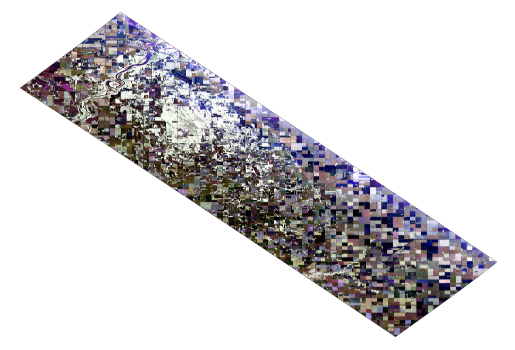

In [5]:
# update the C3 folder based on your folder
# C3Folder = r'./UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd/rlee_3x3/C3'
C3Folder = os.path.join(os.path.dirname(annFile),'rlee_3x3','C3')
pst.pauliRGB(C3Folder)

## H/A/α Decomposition

Progress:   0%|          | 0/260 [00:00<?, ?block/s]

Progress:   0%|          | 1/260 [00:26<1:52:32, 26.07s/block]

Progress:   1%|          | 3/260 [00:26<29:51,  6.97s/block]  

Progress:   2%|▏         | 4/260 [00:26<19:42,  4.62s/block]

Progress:   2%|▏         | 5/260 [00:26<13:23,  3.15s/block]

Progress:   2%|▏         | 6/260 [00:27<09:12,  2.17s/block]

Progress:   3%|▎         | 7/260 [00:27<06:49,  1.62s/block]

Progress:   3%|▎         | 8/260 [00:28<05:37,  1.34s/block]

Progress:   3%|▎         | 9/260 [00:29<05:10,  1.24s/block]

Progress:   4%|▍         | 11/260 [00:29<02:54,  1.43block/s]

Progress:   5%|▍         | 12/260 [00:29<02:21,  1.75block/s]

Progress:   5%|▌         | 13/260 [00:30<02:10,  1.90block/s]

Progress:   6%|▌         | 15/260 [00:37<07:36,  1.86s/block]

Progress:   6%|▌         | 16/260 [00:38<07:18,  1.80s/block]

Progress:   7%|▋         | 17/260 [00:46<13:18,  3.29s/block]

Progress:   7%|▋         | 18/260 [00:46<10:09,  2.52s/block]

Progress:   7%|▋         | 19/260 [00:47<07:56,  1.98s/block]

Progress:   8%|▊         | 20/260 [00:47<05:48,  1.45s/block]

Progress:   8%|▊         | 21/260 [00:48<05:41,  1.43s/block]

Progress:   8%|▊         | 22/260 [00:51<06:28,  1.63s/block]

Progress:   9%|▉         | 23/260 [00:52<06:13,  1.58s/block]

Progress:   9%|▉         | 24/260 [00:53<05:49,  1.48s/block]

Progress:  10%|▉         | 25/260 [00:55<06:06,  1.56s/block]

Progress:  10%|█         | 26/260 [00:56<04:48,  1.23s/block]

Progress:  10%|█         | 27/260 [00:59<07:44,  2.00s/block]

Progress:  11%|█         | 28/260 [01:02<08:52,  2.30s/block]

Progress:  11%|█         | 29/260 [01:02<06:23,  1.66s/block]

Progress:  12%|█▏        | 30/260 [01:03<04:55,  1.28s/block]

Progress:  12%|█▏        | 31/260 [01:06<07:30,  1.97s/block]

Progress:  12%|█▏        | 32/260 [01:07<05:36,  1.47s/block]

Progress:  13%|█▎        | 33/260 [01:07<04:33,  1.21s/block]

Progress:  13%|█▎        | 34/260 [01:08<04:23,  1.16s/block]

Progress:  13%|█▎        | 35/260 [01:09<03:19,  1.13block/s]

Progress:  14%|█▍        | 36/260 [01:09<03:00,  1.24block/s]

Progress:  14%|█▍        | 37/260 [01:09<02:15,  1.64block/s]

Progress:  15%|█▍        | 38/260 [01:11<03:38,  1.02block/s]

Progress:  15%|█▌        | 39/260 [01:13<03:54,  1.06s/block]

Progress:  15%|█▌        | 40/260 [01:15<05:41,  1.55s/block]

Progress:  16%|█▌        | 41/260 [01:19<07:49,  2.14s/block]

Progress:  16%|█▌        | 42/260 [01:28<16:03,  4.42s/block]

Progress:  17%|█▋        | 43/260 [01:29<11:22,  3.14s/block]

Progress:  17%|█▋        | 44/260 [01:31<10:18,  2.86s/block]

Progress:  18%|█▊        | 46/260 [01:31<05:36,  1.57s/block]

Progress:  18%|█▊        | 47/260 [01:31<04:29,  1.26s/block]

Progress:  18%|█▊        | 48/260 [01:34<05:38,  1.60s/block]

Progress:  19%|█▉        | 49/260 [01:36<05:47,  1.65s/block]

Progress:  19%|█▉        | 50/260 [01:36<04:27,  1.27s/block]

Progress:  20%|█▉        | 51/260 [01:37<04:27,  1.28s/block]

Progress:  20%|██        | 52/260 [01:38<03:34,  1.03s/block]

Progress:  20%|██        | 53/260 [01:38<02:46,  1.24block/s]

Progress:  21%|██        | 55/260 [01:39<02:03,  1.66block/s]

Progress:  22%|██▏       | 56/260 [01:39<01:51,  1.82block/s]

Progress:  22%|██▏       | 57/260 [01:39<01:34,  2.15block/s]

Progress:  22%|██▏       | 58/260 [01:42<03:54,  1.16s/block]

Progress:  23%|██▎       | 59/260 [01:42<02:59,  1.12block/s]

Progress:  23%|██▎       | 60/260 [01:43<02:47,  1.19block/s]

Progress:  23%|██▎       | 61/260 [01:44<02:55,  1.13block/s]

Progress:  24%|██▍       | 62/260 [01:48<05:35,  1.69s/block]

Progress:  25%|██▍       | 64/260 [01:49<03:32,  1.08s/block]

Progress:  25%|██▌       | 65/260 [01:50<03:51,  1.19s/block]

Progress:  25%|██▌       | 66/260 [01:50<03:02,  1.07block/s]

Progress:  26%|██▌       | 67/260 [01:51<02:44,  1.18block/s]

Progress:  26%|██▌       | 68/260 [01:51<02:08,  1.50block/s]

Progress:  27%|██▋       | 69/260 [01:51<01:46,  1.79block/s]

Progress:  27%|██▋       | 70/260 [01:52<01:27,  2.16block/s]

Progress:  27%|██▋       | 71/260 [01:52<01:24,  2.23block/s]

Progress:  28%|██▊       | 72/260 [01:52<01:13,  2.55block/s]

Progress:  29%|██▉       | 75/260 [01:52<00:37,  4.97block/s]

Progress:  29%|██▉       | 76/260 [01:53<00:54,  3.37block/s]

Progress:  30%|██▉       | 77/260 [01:54<01:35,  1.92block/s]

Progress:  30%|███       | 78/260 [01:57<03:20,  1.10s/block]

Progress:  30%|███       | 79/260 [01:57<02:40,  1.13block/s]

Progress:  31%|███       | 81/260 [01:59<02:23,  1.25block/s]

Progress:  32%|███▏      | 82/260 [02:00<02:26,  1.22block/s]

Progress:  32%|███▏      | 83/260 [02:02<03:48,  1.29s/block]

Progress:  32%|███▏      | 84/260 [02:04<04:09,  1.42s/block]

Progress:  33%|███▎      | 85/260 [02:06<04:20,  1.49s/block]

Progress:  33%|███▎      | 86/260 [02:06<03:21,  1.16s/block]

Progress:  33%|███▎      | 87/260 [02:06<02:28,  1.17block/s]

Progress:  34%|███▍      | 89/260 [02:06<01:25,  1.99block/s]

Progress:  35%|███▍      | 90/260 [02:07<01:20,  2.12block/s]

Progress:  35%|███▌      | 91/260 [02:07<01:24,  1.99block/s]

Progress:  36%|███▌      | 93/260 [02:08<00:53,  3.14block/s]

Progress:  36%|███▌      | 94/260 [02:08<00:53,  3.08block/s]

Progress:  37%|███▋      | 96/260 [02:08<00:46,  3.56block/s]

Progress:  37%|███▋      | 97/260 [02:08<00:40,  4.02block/s]

Progress:  38%|███▊      | 98/260 [02:10<01:35,  1.69block/s]

Progress:  38%|███▊      | 99/260 [02:12<02:14,  1.20block/s]

Progress:  38%|███▊      | 100/260 [02:13<02:46,  1.04s/block]

Progress:  39%|███▉      | 101/260 [02:15<03:34,  1.35s/block]

Progress:  40%|███▉      | 103/260 [02:16<02:03,  1.27block/s]

Progress:  40%|████      | 104/260 [02:16<02:00,  1.29block/s]

Progress:  40%|████      | 105/260 [02:21<04:17,  1.66s/block]

Progress:  41%|████      | 106/260 [02:21<03:33,  1.39s/block]

Progress:  41%|████      | 107/260 [02:23<03:34,  1.40s/block]

Progress:  42%|████▏     | 108/260 [02:23<02:39,  1.05s/block]

Progress:  42%|████▏     | 109/260 [02:23<02:04,  1.21block/s]

Progress:  42%|████▏     | 110/260 [02:23<01:34,  1.59block/s]

Progress:  43%|████▎     | 112/260 [02:23<00:56,  2.61block/s]

Progress:  44%|████▍     | 114/260 [02:24<00:49,  2.96block/s]

Progress:  44%|████▍     | 115/260 [02:24<00:42,  3.41block/s]

Progress:  45%|████▍     | 116/260 [02:25<00:58,  2.44block/s]

Progress:  45%|████▌     | 118/260 [02:25<00:41,  3.42block/s]

Progress:  46%|████▌     | 119/260 [02:25<00:38,  3.65block/s]

Progress:  47%|████▋     | 121/260 [02:31<02:45,  1.19s/block]

Progress:  47%|████▋     | 122/260 [02:32<02:53,  1.25s/block]

Progress:  47%|████▋     | 123/260 [02:32<02:22,  1.04s/block]

Progress:  48%|████▊     | 124/260 [02:33<01:58,  1.15block/s]

Progress:  48%|████▊     | 125/260 [02:33<01:36,  1.40block/s]

Progress:  48%|████▊     | 126/260 [02:36<02:41,  1.20s/block]

Progress:  49%|████▉     | 127/260 [02:37<02:34,  1.16s/block]

Progress:  49%|████▉     | 128/260 [02:38<02:49,  1.28s/block]

Progress:  50%|████▉     | 129/260 [02:40<02:55,  1.34s/block]

Progress:  50%|█████     | 131/260 [02:40<01:38,  1.31block/s]

Progress:  51%|█████     | 132/260 [02:40<01:20,  1.59block/s]

Progress:  51%|█████     | 133/260 [02:40<01:11,  1.78block/s]

Progress:  52%|█████▏    | 134/260 [02:41<00:57,  2.18block/s]

Progress:  52%|█████▏    | 135/260 [02:41<01:03,  1.97block/s]

Progress:  52%|█████▏    | 136/260 [02:42<01:02,  1.99block/s]

Progress:  53%|█████▎    | 137/260 [02:42<00:48,  2.56block/s]

Progress:  53%|█████▎    | 139/260 [02:42<00:36,  3.36block/s]

Progress:  54%|█████▍    | 140/260 [02:42<00:31,  3.76block/s]

Progress:  54%|█████▍    | 141/260 [02:48<03:02,  1.54s/block]

Progress:  55%|█████▍    | 142/260 [02:49<03:07,  1.59s/block]

Progress:  55%|█████▌    | 143/260 [02:53<04:16,  2.19s/block]

Progress:  55%|█████▌    | 144/260 [02:56<04:49,  2.50s/block]

Progress:  56%|█████▌    | 145/260 [02:57<03:50,  2.00s/block]

Progress:  56%|█████▌    | 146/260 [02:58<03:11,  1.68s/block]

Progress:  57%|█████▋    | 147/260 [03:00<03:07,  1.66s/block]

Progress:  57%|█████▋    | 148/260 [03:09<07:11,  3.86s/block]

Progress:  57%|█████▋    | 149/260 [03:11<06:05,  3.30s/block]

Progress:  58%|█████▊    | 150/260 [03:12<04:57,  2.70s/block]

Progress:  58%|█████▊    | 151/260 [03:13<04:18,  2.37s/block]

Progress:  58%|█████▊    | 152/260 [03:14<03:26,  1.91s/block]

Progress:  59%|█████▉    | 153/260 [03:15<02:55,  1.64s/block]

Progress:  59%|█████▉    | 154/260 [03:15<02:06,  1.19s/block]

Progress:  60%|██████    | 156/260 [03:17<01:54,  1.10s/block]

Progress:  60%|██████    | 157/260 [03:18<01:38,  1.04block/s]

Progress:  61%|██████    | 158/260 [03:18<01:25,  1.20block/s]

Progress:  61%|██████    | 159/260 [03:21<02:04,  1.24s/block]

Progress:  62%|██████▏   | 161/260 [03:21<01:15,  1.32block/s]

Progress:  62%|██████▏   | 162/260 [03:21<01:00,  1.61block/s]

Progress:  63%|██████▎   | 163/260 [03:29<04:04,  2.53s/block]

Progress:  63%|██████▎   | 164/260 [03:32<04:02,  2.53s/block]

Progress:  63%|██████▎   | 165/260 [03:33<03:33,  2.24s/block]

Progress:  64%|██████▍   | 166/260 [03:35<03:13,  2.06s/block]

Progress:  64%|██████▍   | 167/260 [03:36<02:53,  1.87s/block]

Progress:  65%|██████▍   | 168/260 [03:37<02:19,  1.52s/block]

Progress:  65%|██████▌   | 169/260 [03:42<03:48,  2.51s/block]

Progress:  65%|██████▌   | 170/260 [03:44<03:38,  2.43s/block]

Progress:  66%|██████▌   | 171/260 [03:51<05:43,  3.85s/block]

Progress:  66%|██████▌   | 172/260 [03:52<04:14,  2.89s/block]

Progress:  67%|██████▋   | 173/260 [03:53<03:27,  2.38s/block]

Progress:  67%|██████▋   | 174/260 [03:54<02:32,  1.77s/block]

Progress:  67%|██████▋   | 175/260 [03:54<02:07,  1.50s/block]

Progress:  68%|██████▊   | 176/260 [03:55<01:54,  1.36s/block]

Progress:  68%|██████▊   | 177/260 [03:56<01:39,  1.20s/block]

Progress:  68%|██████▊   | 178/260 [03:57<01:18,  1.04block/s]

Progress:  69%|██████▉   | 179/260 [03:58<01:21,  1.00s/block]

Progress:  69%|██████▉   | 180/260 [03:58<01:08,  1.16block/s]

Progress:  70%|██████▉   | 181/260 [03:59<00:53,  1.48block/s]

Progress:  70%|███████   | 183/260 [04:00<00:57,  1.35block/s]

Progress:  71%|███████   | 184/260 [04:03<01:26,  1.14s/block]

Progress:  71%|███████   | 185/260 [04:07<02:31,  2.02s/block]

Progress:  72%|███████▏  | 186/260 [04:12<03:26,  2.79s/block]

Progress:  72%|███████▏  | 187/260 [04:12<02:34,  2.12s/block]

Progress:  72%|███████▏  | 188/260 [04:13<02:03,  1.71s/block]

Progress:  73%|███████▎  | 189/260 [04:13<01:33,  1.32s/block]

Progress:  73%|███████▎  | 190/260 [04:16<02:09,  1.85s/block]

Progress:  73%|███████▎  | 191/260 [04:17<01:44,  1.51s/block]

Progress:  74%|███████▍  | 192/260 [04:26<04:13,  3.73s/block]

Progress:  74%|███████▍  | 193/260 [04:30<04:21,  3.90s/block]

Progress:  75%|███████▍  | 194/260 [04:32<03:21,  3.06s/block]

Progress:  75%|███████▌  | 195/260 [04:32<02:30,  2.31s/block]

Progress:  77%|███████▋  | 199/260 [04:32<00:54,  1.12block/s]

Progress:  77%|███████▋  | 200/260 [04:33<00:46,  1.29block/s]

Progress:  77%|███████▋  | 201/260 [04:33<00:41,  1.42block/s]

Progress:  78%|███████▊  | 202/260 [04:34<00:39,  1.47block/s]

Progress:  78%|███████▊  | 203/260 [04:34<00:34,  1.67block/s]

Progress:  78%|███████▊  | 204/260 [04:36<00:53,  1.04block/s]

Progress:  79%|███████▉  | 205/260 [04:36<00:45,  1.21block/s]

Progress:  79%|███████▉  | 206/260 [04:38<00:51,  1.04block/s]

Progress:  80%|███████▉  | 207/260 [04:46<02:41,  3.04s/block]

Progress:  80%|████████  | 208/260 [04:46<01:54,  2.20s/block]

Progress:  80%|████████  | 209/260 [04:50<02:16,  2.67s/block]

Progress:  81%|████████  | 210/260 [04:51<01:53,  2.27s/block]

Progress:  81%|████████  | 211/260 [04:52<01:31,  1.86s/block]

Progress:  82%|████████▏ | 212/260 [04:53<01:09,  1.46s/block]

Progress:  82%|████████▏ | 213/260 [04:57<01:42,  2.18s/block]

Progress:  82%|████████▏ | 214/260 [04:58<01:25,  1.87s/block]

Progress:  83%|████████▎ | 215/260 [05:01<01:39,  2.22s/block]

Progress:  83%|████████▎ | 216/260 [05:05<02:04,  2.82s/block]

Progress:  83%|████████▎ | 217/260 [05:06<01:40,  2.34s/block]

Progress:  84%|████████▍ | 218/260 [05:06<01:12,  1.74s/block]

Progress:  84%|████████▍ | 219/260 [05:07<00:57,  1.41s/block]

Progress:  85%|████████▍ | 220/260 [05:07<00:41,  1.03s/block]

Progress:  85%|████████▌ | 221/260 [05:07<00:30,  1.30block/s]

Progress:  85%|████████▌ | 222/260 [05:08<00:22,  1.71block/s]

Progress:  86%|████████▌ | 223/260 [05:09<00:26,  1.40block/s]

Progress:  86%|████████▌ | 224/260 [05:10<00:32,  1.12block/s]

Progress:  87%|████████▋ | 225/260 [05:11<00:35,  1.02s/block]

Progress:  87%|████████▋ | 226/260 [05:13<00:39,  1.16s/block]

Progress:  87%|████████▋ | 227/260 [05:14<00:34,  1.05s/block]

Progress:  88%|████████▊ | 228/260 [05:18<01:05,  2.03s/block]

Progress:  88%|████████▊ | 229/260 [05:18<00:48,  1.56s/block]

Progress:  88%|████████▊ | 230/260 [05:21<00:55,  1.86s/block]

Progress:  89%|████████▉ | 231/260 [05:22<00:48,  1.69s/block]

Progress:  89%|████████▉ | 232/260 [05:26<01:02,  2.24s/block]

Progress:  90%|████████▉ | 233/260 [05:27<00:49,  1.82s/block]

Progress:  90%|█████████ | 234/260 [05:29<00:55,  2.13s/block]

Progress:  90%|█████████ | 235/260 [05:30<00:45,  1.82s/block]

Progress:  91%|█████████ | 236/260 [05:31<00:33,  1.41s/block]

Progress:  91%|█████████ | 237/260 [05:33<00:34,  1.50s/block]

Progress:  92%|█████████▏| 238/260 [05:33<00:26,  1.22s/block]

Progress:  92%|█████████▏| 239/260 [05:36<00:36,  1.74s/block]

Progress:  92%|█████████▏| 240/260 [05:38<00:34,  1.70s/block]

Progress:  93%|█████████▎| 241/260 [05:38<00:24,  1.29s/block]

Progress:  93%|█████████▎| 243/260 [05:39<00:14,  1.14block/s]

Progress:  94%|█████████▍| 244/260 [05:40<00:13,  1.21block/s]

Progress:  95%|█████████▌| 247/260 [05:41<00:07,  1.68block/s]

Progress:  95%|█████████▌| 248/260 [05:41<00:06,  1.99block/s]

Progress:  96%|█████████▌| 249/260 [05:42<00:06,  1.59block/s]

Progress:  96%|█████████▌| 250/260 [05:42<00:06,  1.62block/s]

Progress:  97%|█████████▋| 251/260 [05:43<00:04,  2.06block/s]

Progress:  97%|█████████▋| 252/260 [05:43<00:04,  1.78block/s]

Progress:  98%|█████████▊| 254/260 [05:44<00:02,  2.23block/s]

Progress:  98%|█████████▊| 255/260 [05:45<00:02,  2.02block/s]

Progress:  98%|█████████▊| 256/260 [05:46<00:02,  1.65block/s]

Progress:  99%|█████████▉| 257/260 [05:46<00:01,  2.08block/s]

Progress:  99%|█████████▉| 258/260 [05:46<00:00,  2.10block/s]

Progress: 100%|█████████▉| 259/260 [05:47<00:00,  2.03block/s]

Progress: 100%|██████████| 260/260 [05:47<00:00,  2.13block/s]

Progress: 100%|██████████| 260/260 [05:47<00:00,  1.34s/block]

Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\H_fp.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\alpha_fp.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\anisotropy_fp.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\e1_norm.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\e2_norm.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\e3_norm.tif


Execution time for halpha_fp: 06:11 (min:sec)


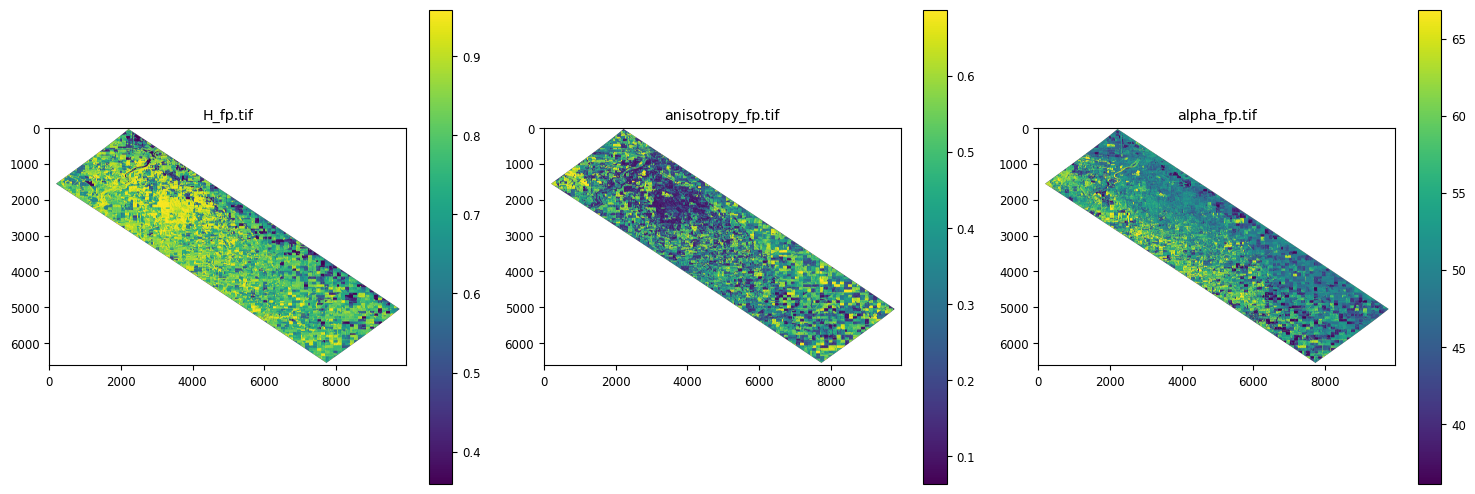

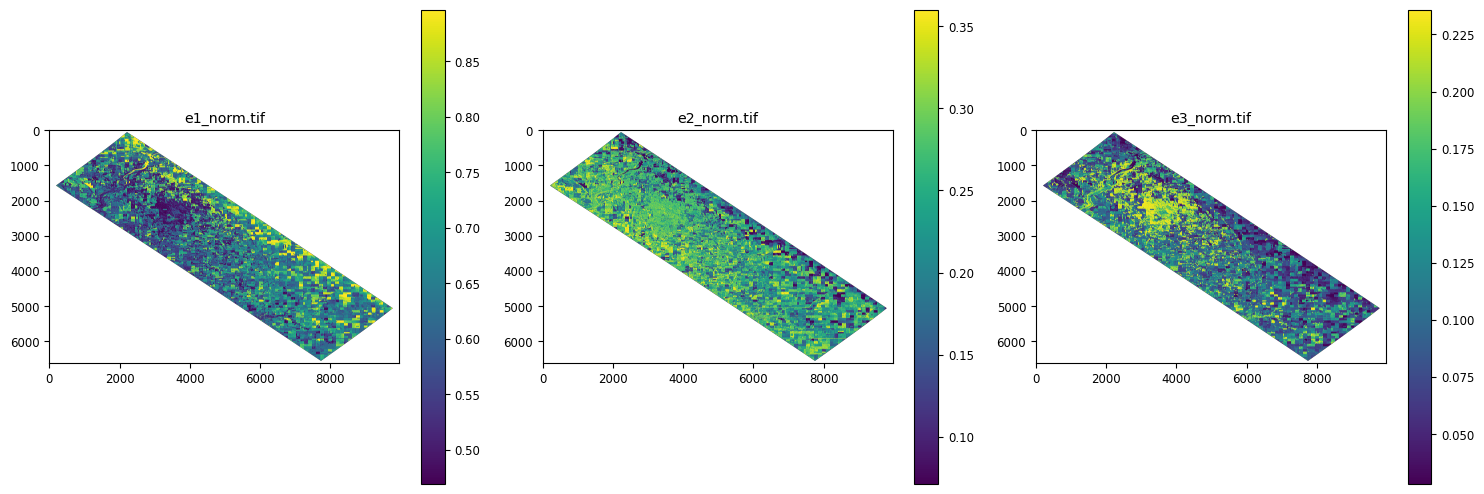

In [6]:

"""
The following function generates H/A/alpha demposition paramters: 
        Alpha, entropy, anisotropy and 
        normalized eigen values e1_norm, e2_norm, e3_norm in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.halpha_fp(C3Folder,win=3) 


### Plotting
plot_images(os.path.join(C3Folder,'H_fp.tif'),
             os.path.join(C3Folder,'anisotropy_fp.tif'),
              os.path.join(C3Folder,'alpha_fp.tif'))

plot_images(os.path.join(C3Folder,'e1_norm.tif'),
             os.path.join(C3Folder,'e2_norm.tif'),
             os.path.join(C3Folder,'e3_norm.tif'))




### Plot Entropy-Alpha 2D plane

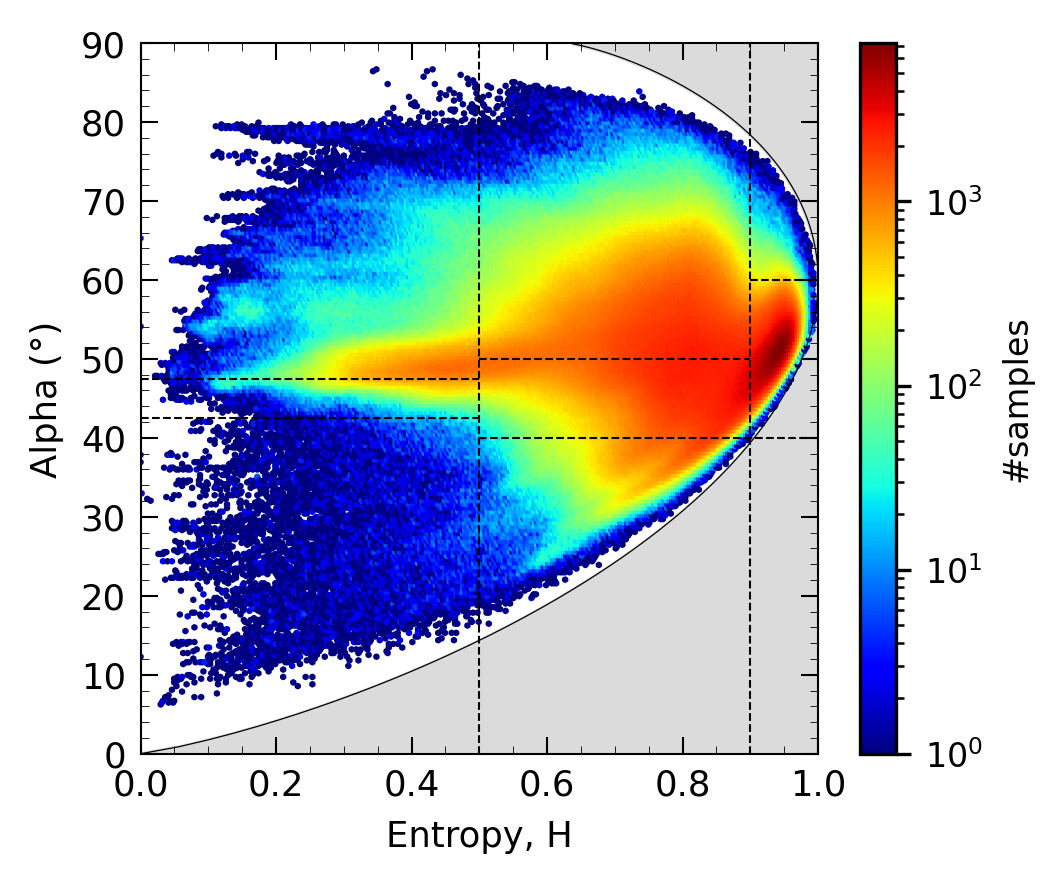

In [7]:
hFile = os.path.join(C3Folder,'H_fp.tif')
alphaFile = os.path.join(C3Folder,'alpha_fp.tif')
pst.halpha_plot_fp(hFile,alphaFile,cmap='jet',
                   norm='log',
                   # path = '',# give a name.png to save the plot as png 
                  zone_lines=True,
                  zone_ids=False,
                  )

#### Plot a 3D Entropy-Anisotropy-Alpha plot

Execution time for haalpha_plot_fp: 9.00 seconds


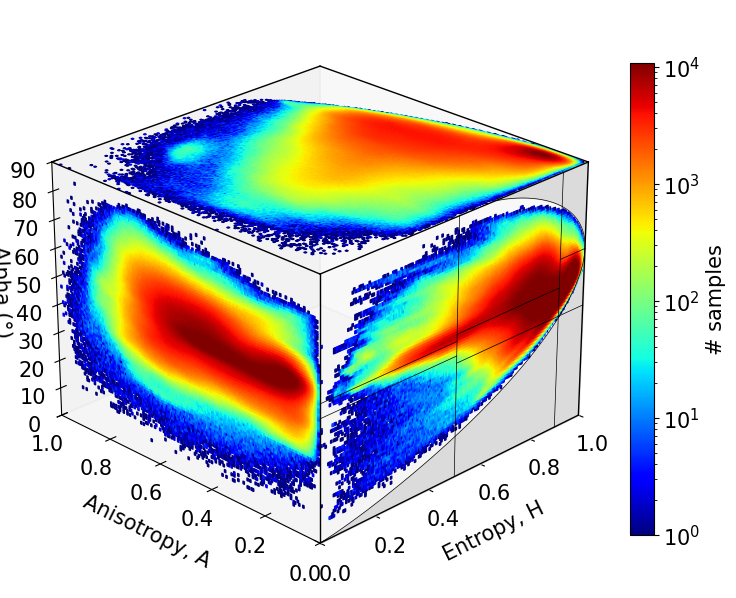

In [8]:
hFile = C3Folder + '/H_fp.tif'
aFile = C3Folder + '/anisotropy_fp.tif'
alphaFile = C3Folder + '/alpha_fp.tif'

pst.haalpha_plot_fp(hFile,aFile,alphaFile,cmap='jet',               
                   norm='log',
                   # path = '',# give a name.png to save the plot as png 
                  zone_lines=True,
                  # zone_ids=False,
                   )

## Neumann Decomposition

Progress:   0%|          | 0/260 [00:00<?, ?block/s]

Progress:   0%|          | 1/260 [00:24<1:47:03, 24.80s/block]

Progress:   1%|          | 2/260 [00:25<44:30, 10.35s/block]  

Progress:   1%|          | 3/260 [00:26<27:01,  6.31s/block]

Progress:   2%|▏         | 4/260 [00:27<18:13,  4.27s/block]

Progress:   2%|▏         | 5/260 [00:28<12:22,  2.91s/block]

Progress:   2%|▏         | 6/260 [00:28<08:59,  2.12s/block]

Progress:   3%|▎         | 7/260 [00:29<07:12,  1.71s/block]

Progress:   3%|▎         | 8/260 [00:29<05:15,  1.25s/block]

Progress:   3%|▎         | 9/260 [00:30<03:45,  1.12block/s]

Progress:   4%|▍         | 11/260 [00:30<02:34,  1.61block/s]

Progress:   5%|▍         | 12/260 [00:30<02:02,  2.02block/s]

Progress:   5%|▌         | 13/260 [00:30<01:39,  2.48block/s]

Progress:   6%|▌         | 15/260 [00:32<02:02,  2.01block/s]

Progress:   6%|▌         | 16/260 [00:34<04:01,  1.01block/s]

Progress:   7%|▋         | 17/260 [00:37<06:14,  1.54s/block]

Progress:   7%|▋         | 18/260 [00:38<05:27,  1.35s/block]

Progress:   7%|▋         | 19/260 [00:39<04:32,  1.13s/block]

Progress:   8%|▊         | 20/260 [00:40<04:37,  1.16s/block]

Progress:   8%|▊         | 21/260 [00:41<04:14,  1.06s/block]

Progress:   8%|▊         | 22/260 [00:42<03:51,  1.03block/s]

Progress:   9%|▉         | 23/260 [00:42<03:44,  1.06block/s]

Progress:   9%|▉         | 24/260 [00:43<02:58,  1.32block/s]

Progress:  10%|▉         | 25/260 [00:43<02:47,  1.40block/s]

Progress:  10%|█         | 26/260 [00:44<02:06,  1.85block/s]

Progress:  10%|█         | 27/260 [00:44<01:38,  2.38block/s]

Progress:  11%|█         | 28/260 [00:44<01:35,  2.43block/s]

Progress:  11%|█         | 29/260 [00:44<01:16,  3.01block/s]

Progress:  12%|█▏        | 30/260 [00:45<01:51,  2.06block/s]

Progress:  12%|█▏        | 31/260 [00:48<04:32,  1.19s/block]

Progress:  12%|█▏        | 32/260 [00:50<05:32,  1.46s/block]

Progress:  13%|█▎        | 33/260 [00:51<04:35,  1.21s/block]

Progress:  13%|█▎        | 34/260 [00:52<04:25,  1.18s/block]

Progress:  13%|█▎        | 35/260 [00:53<04:12,  1.12s/block]

Progress:  14%|█▍        | 36/260 [00:54<03:55,  1.05s/block]

Progress:  14%|█▍        | 37/260 [00:55<04:01,  1.08s/block]

Progress:  15%|█▍        | 38/260 [00:55<03:07,  1.19block/s]

Progress:  15%|█▌        | 40/260 [00:57<03:00,  1.22block/s]

Progress:  16%|█▌        | 41/260 [00:57<02:55,  1.24block/s]

Progress:  16%|█▌        | 42/260 [00:58<03:07,  1.16block/s]

Progress:  17%|█▋        | 43/260 [00:59<02:35,  1.40block/s]

Progress:  17%|█▋        | 45/260 [01:00<02:17,  1.57block/s]

Progress:  18%|█▊        | 46/260 [01:01<02:27,  1.45block/s]

Progress:  18%|█▊        | 47/260 [01:02<03:25,  1.04block/s]

Progress:  18%|█▊        | 48/260 [01:04<04:16,  1.21s/block]

Progress:  19%|█▉        | 49/260 [01:05<04:02,  1.15s/block]

Progress:  19%|█▉        | 50/260 [01:06<04:01,  1.15s/block]

Progress:  20%|█▉        | 51/260 [01:07<03:44,  1.07s/block]

Progress:  20%|██        | 52/260 [01:07<02:46,  1.25block/s]

Progress:  20%|██        | 53/260 [01:08<02:55,  1.18block/s]

Progress:  21%|██        | 54/260 [01:09<02:14,  1.54block/s]

Progress:  21%|██        | 55/260 [01:09<01:50,  1.85block/s]

Progress:  22%|██▏       | 56/260 [01:10<01:58,  1.71block/s]

Progress:  22%|██▏       | 57/260 [01:11<02:25,  1.40block/s]

Progress:  22%|██▏       | 58/260 [01:11<02:14,  1.51block/s]

Progress:  23%|██▎       | 59/260 [01:13<03:16,  1.02block/s]

Progress:  23%|██▎       | 60/260 [01:13<02:36,  1.28block/s]

Progress:  23%|██▎       | 61/260 [01:14<02:36,  1.27block/s]

Progress:  24%|██▍       | 62/260 [01:15<03:10,  1.04block/s]

Progress:  24%|██▍       | 63/260 [01:18<04:22,  1.33s/block]

Progress:  25%|██▍       | 64/260 [01:18<03:33,  1.09s/block]

Progress:  25%|██▌       | 65/260 [01:20<04:13,  1.30s/block]

Progress:  25%|██▌       | 66/260 [01:20<03:32,  1.10s/block]

Progress:  26%|██▌       | 67/260 [01:21<02:54,  1.11block/s]

Progress:  26%|██▌       | 68/260 [01:22<03:03,  1.05block/s]

Progress:  27%|██▋       | 70/260 [01:23<02:00,  1.58block/s]

Progress:  27%|██▋       | 71/260 [01:24<02:22,  1.32block/s]

Progress:  28%|██▊       | 72/260 [01:25<02:30,  1.25block/s]

Progress:  28%|██▊       | 73/260 [01:25<02:17,  1.36block/s]

Progress:  28%|██▊       | 74/260 [01:27<03:06,  1.00s/block]

Progress:  29%|██▉       | 75/260 [01:27<02:28,  1.25block/s]

Progress:  29%|██▉       | 76/260 [01:27<01:59,  1.54block/s]

Progress:  30%|██▉       | 77/260 [01:28<01:36,  1.90block/s]

Progress:  30%|███       | 78/260 [01:29<02:27,  1.24block/s]

Progress:  30%|███       | 79/260 [01:31<03:03,  1.02s/block]

Progress:  31%|███       | 80/260 [01:32<03:21,  1.12s/block]

Progress:  31%|███       | 81/260 [01:33<03:33,  1.19s/block]

Progress:  32%|███▏      | 82/260 [01:35<04:01,  1.36s/block]

Progress:  32%|███▏      | 83/260 [01:35<03:01,  1.02s/block]

Progress:  32%|███▏      | 84/260 [01:36<02:47,  1.05block/s]

Progress:  33%|███▎      | 85/260 [01:36<02:14,  1.30block/s]

Progress:  33%|███▎      | 86/260 [01:38<02:28,  1.17block/s]

Progress:  33%|███▎      | 87/260 [01:38<02:11,  1.32block/s]

Progress:  34%|███▍      | 88/260 [01:39<02:30,  1.14block/s]

Progress:  34%|███▍      | 89/260 [01:41<02:56,  1.03s/block]

Progress:  35%|███▍      | 90/260 [01:41<02:22,  1.19block/s]

Progress:  35%|███▌      | 91/260 [01:41<01:49,  1.55block/s]

Progress:  35%|███▌      | 92/260 [01:41<01:28,  1.90block/s]

Progress:  36%|███▌      | 93/260 [01:43<02:24,  1.16block/s]

Progress:  36%|███▌      | 94/260 [01:43<01:47,  1.54block/s]

Progress:  37%|███▋      | 95/260 [01:44<01:56,  1.42block/s]

Progress:  37%|███▋      | 96/260 [01:45<02:08,  1.27block/s]

Progress:  37%|███▋      | 97/260 [01:47<02:59,  1.10s/block]

Progress:  38%|███▊      | 98/260 [01:48<03:11,  1.18s/block]

Progress:  38%|███▊      | 99/260 [01:49<02:43,  1.01s/block]

Progress:  38%|███▊      | 100/260 [01:49<02:06,  1.27block/s]

Progress:  39%|███▉      | 101/260 [01:51<02:53,  1.09s/block]

Progress:  39%|███▉      | 102/260 [01:51<02:14,  1.17block/s]

Progress:  40%|███▉      | 103/260 [01:52<02:05,  1.25block/s]

Progress:  40%|████      | 104/260 [01:53<02:42,  1.04s/block]

Progress:  40%|████      | 105/260 [01:54<02:16,  1.14block/s]

Progress:  41%|████      | 106/260 [01:54<01:41,  1.52block/s]

Progress:  42%|████▏     | 108/260 [01:56<02:05,  1.21block/s]

Progress:  42%|████▏     | 109/260 [01:57<01:54,  1.32block/s]

Progress:  42%|████▏     | 110/260 [01:57<01:41,  1.48block/s]

Progress:  43%|████▎     | 111/260 [01:59<02:42,  1.09s/block]

Progress:  43%|████▎     | 112/260 [02:00<02:08,  1.15block/s]

Progress:  43%|████▎     | 113/260 [02:01<02:07,  1.16block/s]

Progress:  44%|████▍     | 114/260 [02:01<01:41,  1.44block/s]

Progress:  45%|████▌     | 117/260 [02:02<01:12,  1.97block/s]

Progress:  46%|████▌     | 119/260 [02:02<00:57,  2.46block/s]

Progress:  46%|████▌     | 120/260 [02:03<01:03,  2.19block/s]

Progress:  47%|████▋     | 121/260 [02:03<00:57,  2.43block/s]

Progress:  47%|████▋     | 122/260 [02:04<00:59,  2.34block/s]

Progress:  48%|████▊     | 124/260 [02:04<00:45,  2.97block/s]

Progress:  48%|████▊     | 125/260 [02:04<00:39,  3.38block/s]

Progress:  48%|████▊     | 126/260 [02:06<01:11,  1.88block/s]

Progress:  49%|████▉     | 127/260 [02:06<00:59,  2.22block/s]

Progress:  49%|████▉     | 128/260 [02:06<01:00,  2.18block/s]

Progress:  50%|████▉     | 129/260 [02:06<00:51,  2.52block/s]

Progress:  50%|█████     | 130/260 [02:07<00:40,  3.18block/s]

Progress:  50%|█████     | 131/260 [02:07<00:36,  3.58block/s]

Progress:  51%|█████     | 132/260 [02:07<00:37,  3.45block/s]

Progress:  51%|█████     | 133/260 [02:08<00:42,  3.00block/s]

Progress:  52%|█████▏    | 135/260 [02:08<00:30,  4.06block/s]

Progress:  52%|█████▏    | 136/260 [02:08<00:43,  2.82block/s]

Progress:  53%|█████▎    | 137/260 [02:09<00:36,  3.36block/s]

Progress:  53%|█████▎    | 138/260 [02:09<00:47,  2.55block/s]

Progress:  53%|█████▎    | 139/260 [02:09<00:38,  3.12block/s]

Progress:  54%|█████▍    | 141/260 [02:11<01:02,  1.89block/s]

Progress:  55%|█████▍    | 142/260 [02:11<00:53,  2.22block/s]

Progress:  55%|█████▌    | 143/260 [02:12<00:50,  2.33block/s]

Progress:  55%|█████▌    | 144/260 [02:12<00:43,  2.67block/s]

Progress:  56%|█████▌    | 145/260 [02:12<00:35,  3.26block/s]

Progress:  56%|█████▌    | 146/260 [02:12<00:43,  2.63block/s]

Progress:  57%|█████▋    | 148/260 [02:13<00:39,  2.84block/s]

Progress:  58%|█████▊    | 150/260 [02:13<00:30,  3.66block/s]

Progress:  58%|█████▊    | 151/260 [02:14<00:37,  2.94block/s]

Progress:  59%|█████▉    | 153/260 [02:15<00:35,  3.03block/s]

Progress:  59%|█████▉    | 154/260 [02:15<00:33,  3.19block/s]

Progress:  60%|██████    | 156/260 [02:15<00:22,  4.61block/s]

Progress:  60%|██████    | 157/260 [02:16<00:46,  2.21block/s]

Progress:  61%|██████    | 158/260 [02:17<00:39,  2.55block/s]

Progress:  61%|██████    | 159/260 [02:17<00:45,  2.24block/s]

Progress:  62%|██████▏   | 160/260 [02:17<00:38,  2.57block/s]

Progress:  62%|██████▏   | 161/260 [02:18<00:46,  2.15block/s]

Progress:  63%|██████▎   | 163/260 [02:19<00:35,  2.71block/s]

Progress:  63%|██████▎   | 165/260 [02:19<00:28,  3.30block/s]

Progress:  64%|██████▍   | 166/260 [02:19<00:34,  2.76block/s]

Progress:  65%|██████▍   | 168/260 [02:20<00:31,  2.95block/s]

Progress:  65%|██████▌   | 169/260 [02:20<00:29,  3.04block/s]

Progress:  65%|██████▌   | 170/260 [02:20<00:24,  3.62block/s]

Progress:  66%|██████▌   | 171/260 [02:21<00:23,  3.83block/s]

Progress:  66%|██████▌   | 172/260 [02:22<00:38,  2.28block/s]

Progress:  67%|██████▋   | 173/260 [02:22<00:34,  2.50block/s]

Progress:  67%|██████▋   | 174/260 [02:22<00:27,  3.12block/s]

Progress:  67%|██████▋   | 175/260 [02:23<00:34,  2.43block/s]

Progress:  68%|██████▊   | 177/260 [02:24<00:35,  2.33block/s]

Progress:  68%|██████▊   | 178/260 [02:24<00:28,  2.86block/s]

Progress:  69%|██████▉   | 179/260 [02:24<00:28,  2.84block/s]

Progress:  70%|██████▉   | 181/260 [02:25<00:28,  2.79block/s]

Progress:  70%|███████   | 182/260 [02:25<00:27,  2.82block/s]

Progress:  70%|███████   | 183/260 [02:25<00:27,  2.82block/s]

Progress:  71%|███████   | 184/260 [02:26<00:26,  2.92block/s]

Progress:  71%|███████   | 185/260 [02:26<00:25,  3.00block/s]

Progress:  72%|███████▏  | 187/260 [02:27<00:31,  2.29block/s]

Progress:  72%|███████▏  | 188/260 [02:27<00:25,  2.77block/s]

Progress:  73%|███████▎  | 190/260 [02:28<00:26,  2.60block/s]

Progress:  73%|███████▎  | 191/260 [02:28<00:22,  3.01block/s]

Progress:  74%|███████▍  | 192/260 [02:29<00:28,  2.36block/s]

Progress:  74%|███████▍  | 193/260 [02:29<00:25,  2.64block/s]

Progress:  75%|███████▌  | 195/260 [02:30<00:18,  3.60block/s]

Progress:  76%|███████▌  | 197/260 [02:31<00:23,  2.72block/s]

Progress:  76%|███████▌  | 198/260 [02:31<00:21,  2.88block/s]

Progress:  77%|███████▋  | 200/260 [02:31<00:15,  3.89block/s]

Progress:  77%|███████▋  | 201/260 [02:31<00:17,  3.47block/s]

Progress:  78%|███████▊  | 202/260 [02:33<00:28,  2.00block/s]

Progress:  78%|███████▊  | 203/260 [02:33<00:26,  2.16block/s]

Progress:  79%|███████▉  | 205/260 [02:34<00:22,  2.45block/s]

Progress:  79%|███████▉  | 206/260 [02:34<00:20,  2.68block/s]

Progress:  80%|███████▉  | 207/260 [02:35<00:25,  2.11block/s]

Progress:  80%|████████  | 208/260 [02:35<00:21,  2.42block/s]

Progress:  81%|████████  | 210/260 [02:35<00:15,  3.32block/s]

Progress:  82%|████████▏ | 212/260 [02:36<00:18,  2.64block/s]

Progress:  82%|████████▏ | 213/260 [02:37<00:17,  2.67block/s]

Progress:  83%|████████▎ | 216/260 [02:37<00:09,  4.72block/s]

Progress:  84%|████████▍ | 218/260 [02:38<00:16,  2.51block/s]

Progress:  84%|████████▍ | 219/260 [02:39<00:15,  2.66block/s]

Progress:  85%|████████▍ | 220/260 [02:39<00:14,  2.80block/s]

Progress:  85%|████████▌ | 221/260 [02:40<00:15,  2.45block/s]

Progress:  85%|████████▌ | 222/260 [02:40<00:19,  1.90block/s]

Progress:  86%|████████▌ | 223/260 [02:41<00:19,  1.92block/s]

Progress:  86%|████████▌ | 224/260 [02:41<00:17,  2.03block/s]

Progress:  87%|████████▋ | 225/260 [02:41<00:13,  2.51block/s]

Progress:  87%|████████▋ | 226/260 [02:42<00:12,  2.83block/s]

Progress:  87%|████████▋ | 227/260 [02:42<00:13,  2.37block/s]

Progress:  88%|████████▊ | 228/260 [02:42<00:11,  2.88block/s]

Progress:  88%|████████▊ | 229/260 [02:43<00:10,  3.01block/s]

Progress:  88%|████████▊ | 230/260 [02:43<00:08,  3.44block/s]

Progress:  89%|████████▉ | 231/260 [02:43<00:06,  4.23block/s]

Progress:  89%|████████▉ | 232/260 [02:43<00:05,  4.94block/s]

Progress:  90%|████████▉ | 233/260 [02:44<00:11,  2.36block/s]

Progress:  90%|█████████ | 234/260 [02:44<00:10,  2.57block/s]

Progress:  91%|█████████ | 236/260 [02:45<00:09,  2.64block/s]

Progress:  91%|█████████ | 237/260 [02:45<00:07,  2.88block/s]

Progress:  92%|█████████▏| 238/260 [02:46<00:10,  2.08block/s]

Progress:  92%|█████████▏| 239/260 [02:47<00:10,  2.04block/s]

Progress:  92%|█████████▏| 240/260 [02:47<00:08,  2.41block/s]

Progress:  93%|█████████▎| 241/260 [02:47<00:06,  2.96block/s]

Progress:  93%|█████████▎| 242/260 [02:48<00:06,  2.59block/s]

Progress:  93%|█████████▎| 243/260 [02:48<00:05,  2.85block/s]

Progress:  94%|█████████▍| 244/260 [02:48<00:05,  2.99block/s]

Progress:  94%|█████████▍| 245/260 [02:49<00:04,  3.03block/s]

Progress:  95%|█████████▍| 246/260 [02:49<00:04,  3.49block/s]

Progress:  95%|█████████▌| 247/260 [02:49<00:03,  3.79block/s]

Progress:  95%|█████████▌| 248/260 [02:50<00:04,  2.50block/s]

Progress:  96%|█████████▌| 249/260 [02:50<00:03,  2.85block/s]

Progress:  96%|█████████▌| 250/260 [02:50<00:03,  3.18block/s]

Progress:  97%|█████████▋| 251/260 [02:51<00:03,  2.58block/s]

Progress:  97%|█████████▋| 252/260 [02:51<00:02,  3.13block/s]

Progress:  97%|█████████▋| 253/260 [02:51<00:02,  3.19block/s]

Progress:  98%|█████████▊| 254/260 [02:51<00:01,  3.71block/s]

Progress:  98%|█████████▊| 255/260 [02:52<00:01,  3.24block/s]

Progress:  98%|█████████▊| 256/260 [02:52<00:01,  3.78block/s]

Progress:  99%|█████████▉| 258/260 [02:52<00:00,  4.18block/s]

Progress: 100%|█████████▉| 259/260 [02:53<00:00,  4.16block/s]

Progress: 100%|██████████| 260/260 [02:53<00:00,  1.50block/s]

Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\Neu_psi.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\Neu_delta_mod.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\Neu_delta_pha.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\Neu_tau.tif


Execution time for neu_fp: 03:11 (min:sec)


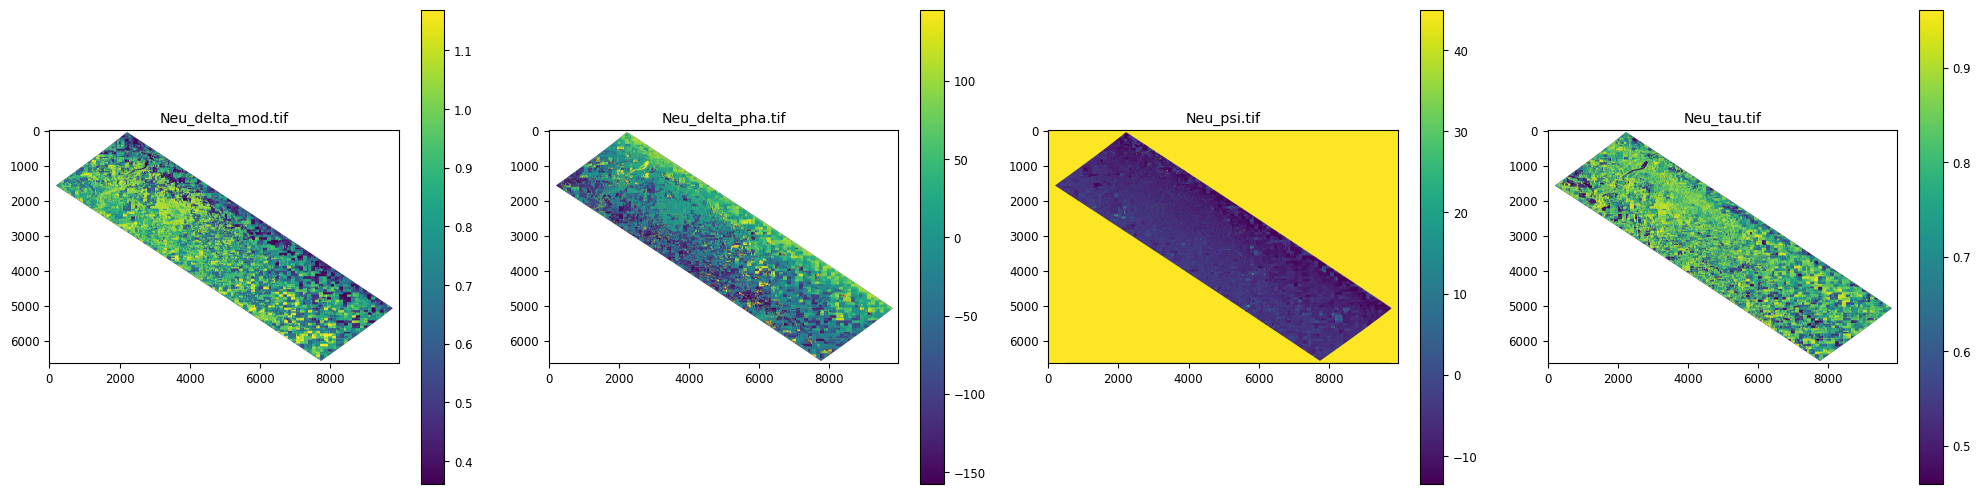

In [9]:
"""
The following function generates Nuemann demposition paramters: 
        Neu_psi, Neu_delta_mod, Neu_delta_pha, and Neu_tau in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.neu_fp(C3Folder,win=3) 

### Plotting
plot_images( os.path.join(C3Folder,'Neu_delta_mod.tif'),
             os.path.join(C3Folder,'Neu_delta_pha.tif'),
             os.path.join(C3Folder,'Neu_psi.tif'),
             os.path.join(C3Folder,'Neu_tau.tif'),
                      )


## Non-negative eigen value decomposition (NNED )

Progress:   0%|          | 0/260 [00:00<?, ?block/s]

Progress:   0%|          | 1/260 [00:09<41:15,  9.56s/block]

Progress:   2%|▏         | 4/260 [00:09<08:05,  1.90s/block]

Progress:   3%|▎         | 7/260 [00:10<03:47,  1.11block/s]

Progress:   3%|▎         | 9/260 [00:10<02:59,  1.40block/s]

Progress:   4%|▍         | 11/260 [00:12<02:54,  1.43block/s]

Progress:   5%|▍         | 12/260 [00:12<02:34,  1.61block/s]

Progress:   7%|▋         | 17/260 [00:12<01:09,  3.48block/s]

Progress:   8%|▊         | 21/260 [00:12<00:48,  4.95block/s]

Progress:   9%|▉         | 24/260 [00:13<00:39,  5.96block/s]

Progress:  10%|█         | 26/260 [00:14<01:06,  3.54block/s]

Progress:  10%|█         | 27/260 [00:14<01:07,  3.46block/s]

Progress:  11%|█         | 28/260 [00:15<01:17,  3.00block/s]

Progress:  12%|█▏        | 31/260 [00:15<00:49,  4.66block/s]

Progress:  13%|█▎        | 33/260 [00:15<00:41,  5.48block/s]

Progress:  13%|█▎        | 35/260 [00:16<00:44,  5.07block/s]

Progress:  14%|█▍        | 36/260 [00:16<00:45,  4.94block/s]

Progress:  14%|█▍        | 37/260 [00:16<00:59,  3.74block/s]

Progress:  16%|█▌        | 41/260 [00:17<00:31,  7.01block/s]

Progress:  17%|█▋        | 43/260 [00:17<00:49,  4.39block/s]

Progress:  17%|█▋        | 45/260 [00:18<00:48,  4.45block/s]

Progress:  18%|█▊        | 46/260 [00:18<00:52,  4.07block/s]

Progress:  19%|█▉        | 49/260 [00:18<00:35,  5.91block/s]

Progress:  20%|██        | 52/260 [00:19<00:36,  5.65block/s]

Progress:  20%|██        | 53/260 [00:20<00:56,  3.66block/s]

Progress:  21%|██        | 54/260 [00:20<00:51,  3.98block/s]

Progress:  22%|██▏       | 56/260 [00:20<00:50,  4.04block/s]

Progress:  23%|██▎       | 59/260 [00:21<00:32,  6.12block/s]

Progress:  23%|██▎       | 61/260 [00:21<00:28,  6.92block/s]

Progress:  24%|██▍       | 63/260 [00:21<00:27,  7.16block/s]

Progress:  25%|██▍       | 64/260 [00:21<00:37,  5.29block/s]

Progress:  25%|██▌       | 66/260 [00:22<00:28,  6.92block/s]

Progress:  26%|██▌       | 68/260 [00:22<00:45,  4.24block/s]

Progress:  27%|██▋       | 69/260 [00:23<00:47,  4.06block/s]

Progress:  27%|██▋       | 71/260 [00:23<00:44,  4.24block/s]

Progress:  28%|██▊       | 72/260 [00:24<00:51,  3.66block/s]

Progress:  28%|██▊       | 74/260 [00:24<00:37,  4.91block/s]

Progress:  29%|██▉       | 75/260 [00:24<00:44,  4.17block/s]

Progress:  30%|██▉       | 77/260 [00:24<00:33,  5.45block/s]

Progress:  31%|███       | 80/260 [00:25<00:26,  6.77block/s]

Progress:  31%|███       | 81/260 [00:25<00:33,  5.41block/s]

Progress:  32%|███▏      | 83/260 [00:25<00:26,  6.60block/s]

Progress:  32%|███▏      | 84/260 [00:25<00:29,  5.89block/s]

Progress:  33%|███▎      | 85/260 [00:26<00:29,  5.90block/s]

Progress:  33%|███▎      | 86/260 [00:26<00:28,  6.20block/s]

Progress:  33%|███▎      | 87/260 [00:27<00:57,  2.99block/s]

Progress:  34%|███▍      | 88/260 [00:27<00:48,  3.55block/s]

Progress:  35%|███▍      | 90/260 [00:27<00:34,  4.90block/s]

Progress:  35%|███▌      | 92/260 [00:27<00:29,  5.77block/s]

Progress:  36%|███▌      | 93/260 [00:28<00:40,  4.13block/s]

Progress:  37%|███▋      | 96/260 [00:28<00:24,  6.68block/s]

Progress:  38%|███▊      | 98/260 [00:28<00:21,  7.68block/s]

Progress:  38%|███▊      | 100/260 [00:28<00:21,  7.37block/s]

Progress:  39%|███▉      | 101/260 [00:28<00:21,  7.56block/s]

Progress:  39%|███▉      | 102/260 [00:29<00:36,  4.32block/s]

Progress:  40%|███▉      | 103/260 [00:29<00:44,  3.56block/s]

Progress:  40%|████      | 105/260 [00:30<00:34,  4.43block/s]

Progress:  41%|████      | 106/260 [00:30<00:32,  4.76block/s]

Progress:  42%|████▏     | 108/260 [00:30<00:28,  5.35block/s]

Progress:  42%|████▏     | 109/260 [00:30<00:30,  5.00block/s]

Progress:  42%|████▏     | 110/260 [00:31<00:29,  5.12block/s]

Progress:  43%|████▎     | 111/260 [00:31<00:36,  4.13block/s]

Progress:  43%|████▎     | 112/260 [00:31<00:40,  3.62block/s]

Progress:  43%|████▎     | 113/260 [00:31<00:35,  4.19block/s]

Progress:  44%|████▍     | 114/260 [00:32<00:29,  4.89block/s]

Progress:  45%|████▌     | 117/260 [00:32<00:15,  8.94block/s]

Progress:  46%|████▌     | 119/260 [00:32<00:19,  7.16block/s]

Progress:  47%|████▋     | 121/260 [00:33<00:26,  5.32block/s]

Progress:  47%|████▋     | 122/260 [00:33<00:26,  5.15block/s]

Progress:  47%|████▋     | 123/260 [00:33<00:27,  5.03block/s]

Progress:  48%|████▊     | 124/260 [00:33<00:30,  4.40block/s]

Progress:  48%|████▊     | 125/260 [00:34<00:28,  4.78block/s]

Progress:  48%|████▊     | 126/260 [00:34<00:24,  5.54block/s]

Progress:  49%|████▉     | 127/260 [00:34<00:22,  5.88block/s]

Progress:  49%|████▉     | 128/260 [00:34<00:26,  5.02block/s]

Progress:  50%|████▉     | 129/260 [00:35<00:43,  3.01block/s]

Progress:  50%|█████     | 130/260 [00:35<00:40,  3.19block/s]

Progress:  51%|█████     | 132/260 [00:35<00:27,  4.68block/s]

Progress:  51%|█████     | 133/260 [00:35<00:25,  5.04block/s]

Progress:  52%|█████▏    | 134/260 [00:36<00:27,  4.62block/s]

Progress:  52%|█████▏    | 135/260 [00:36<00:30,  4.06block/s]

Progress:  53%|█████▎    | 138/260 [00:36<00:16,  7.30block/s]

Progress:  54%|█████▍    | 141/260 [00:36<00:13,  8.60block/s]

Progress:  55%|█████▌    | 143/260 [00:37<00:14,  8.31block/s]

Progress:  55%|█████▌    | 144/260 [00:37<00:25,  4.48block/s]

Progress:  56%|█████▌    | 145/260 [00:38<00:26,  4.41block/s]

Progress:  56%|█████▌    | 146/260 [00:38<00:24,  4.56block/s]

Progress:  57%|█████▋    | 147/260 [00:38<00:24,  4.63block/s]

Progress:  57%|█████▋    | 148/260 [00:38<00:21,  5.29block/s]

Progress:  58%|█████▊    | 150/260 [00:39<00:24,  4.58block/s]

Progress:  58%|█████▊    | 151/260 [00:39<00:21,  4.97block/s]

Progress:  58%|█████▊    | 152/260 [00:39<00:20,  5.21block/s]

Progress:  59%|█████▉    | 153/260 [00:39<00:26,  4.10block/s]

Progress:  59%|█████▉    | 154/260 [00:39<00:25,  4.15block/s]

Progress:  60%|██████    | 156/260 [00:40<00:20,  5.05block/s]

Progress:  60%|██████    | 157/260 [00:40<00:19,  5.26block/s]

Progress:  62%|██████▏   | 160/260 [00:40<00:12,  7.74block/s]

Progress:  62%|██████▏   | 161/260 [00:40<00:14,  7.06block/s]

Progress:  62%|██████▏   | 162/260 [00:41<00:17,  5.65block/s]

Progress:  63%|██████▎   | 163/260 [00:41<00:18,  5.35block/s]

Progress:  63%|██████▎   | 165/260 [00:41<00:15,  6.27block/s]

Progress:  64%|██████▍   | 166/260 [00:41<00:17,  5.28block/s]

Progress:  65%|██████▍   | 168/260 [00:42<00:16,  5.45block/s]

Progress:  65%|██████▌   | 169/260 [00:42<00:26,  3.41block/s]

Progress:  65%|██████▌   | 170/260 [00:43<00:22,  4.00block/s]

Progress:  67%|██████▋   | 173/260 [00:43<00:16,  5.24block/s]

Progress:  67%|██████▋   | 174/260 [00:43<00:16,  5.20block/s]

Progress:  67%|██████▋   | 175/260 [00:43<00:16,  5.21block/s]

Progress:  69%|██████▉   | 179/260 [00:44<00:09,  8.16block/s]

Progress:  69%|██████▉   | 180/260 [00:44<00:10,  7.80block/s]

Progress:  70%|██████▉   | 181/260 [00:44<00:11,  6.92block/s]

Progress:  70%|███████   | 182/260 [00:44<00:12,  6.26block/s]

Progress:  70%|███████   | 183/260 [00:44<00:12,  5.98block/s]

Progress:  71%|███████   | 184/260 [00:45<00:23,  3.22block/s]

Progress:  71%|███████   | 185/260 [00:45<00:21,  3.44block/s]

Progress:  72%|███████▏  | 186/260 [00:46<00:21,  3.39block/s]

Progress:  73%|███████▎  | 190/260 [00:46<00:12,  5.44block/s]

Progress:  74%|███████▍  | 192/260 [00:47<00:13,  4.98block/s]

Progress:  74%|███████▍  | 193/260 [00:47<00:13,  5.11block/s]

Progress:  75%|███████▍  | 194/260 [00:47<00:12,  5.15block/s]

Progress:  75%|███████▌  | 195/260 [00:47<00:11,  5.49block/s]

Progress:  77%|███████▋  | 199/260 [00:47<00:06,  8.98block/s]

Progress:  77%|███████▋  | 200/260 [00:48<00:08,  6.91block/s]

Progress:  77%|███████▋  | 201/260 [00:48<00:13,  4.23block/s]

Progress:  78%|███████▊  | 202/260 [00:49<00:15,  3.73block/s]

Progress:  78%|███████▊  | 203/260 [00:49<00:13,  4.33block/s]

Progress:  79%|███████▉  | 205/260 [00:49<00:10,  5.47block/s]

Progress:  80%|███████▉  | 207/260 [00:49<00:07,  6.71block/s]

Progress:  80%|████████  | 208/260 [00:49<00:08,  6.47block/s]

Progress:  80%|████████  | 209/260 [00:49<00:07,  6.84block/s]

Progress:  81%|████████  | 210/260 [00:50<00:14,  3.56block/s]

Progress:  82%|████████▏ | 212/260 [00:50<00:10,  4.67block/s]

Progress:  82%|████████▏ | 213/260 [00:51<00:10,  4.36block/s]

Progress:  83%|████████▎ | 216/260 [00:51<00:05,  7.37block/s]

Progress:  84%|████████▍ | 218/260 [00:51<00:07,  5.65block/s]

Progress:  84%|████████▍ | 219/260 [00:52<00:08,  5.05block/s]

Progress:  85%|████████▍ | 220/260 [00:52<00:07,  5.18block/s]

Progress:  85%|████████▌ | 221/260 [00:52<00:08,  4.81block/s]

Progress:  85%|████████▌ | 222/260 [00:52<00:07,  5.36block/s]

Progress:  86%|████████▌ | 223/260 [00:52<00:07,  4.74block/s]

Progress:  87%|████████▋ | 225/260 [00:53<00:06,  5.40block/s]

Progress:  87%|████████▋ | 226/260 [00:53<00:08,  4.14block/s]

Progress:  87%|████████▋ | 227/260 [00:53<00:07,  4.47block/s]

Progress:  88%|████████▊ | 229/260 [00:54<00:06,  4.69block/s]

Progress:  88%|████████▊ | 230/260 [00:54<00:06,  4.30block/s]

Progress:  89%|████████▉ | 232/260 [00:54<00:04,  6.08block/s]

Progress:  90%|█████████ | 234/260 [00:54<00:03,  6.64block/s]

Progress:  91%|█████████ | 236/260 [00:55<00:04,  5.96block/s]

Progress:  91%|█████████ | 237/260 [00:55<00:03,  6.23block/s]

Progress:  92%|█████████▏| 239/260 [00:55<00:03,  5.95block/s]

Progress:  92%|█████████▏| 240/260 [00:56<00:03,  5.61block/s]

Progress:  93%|█████████▎| 241/260 [00:56<00:03,  6.13block/s]

Progress:  93%|█████████▎| 242/260 [00:56<00:03,  4.84block/s]

Progress:  93%|█████████▎| 243/260 [00:56<00:03,  4.53block/s]

Progress:  94%|█████████▍| 245/260 [00:57<00:02,  5.31block/s]

Progress:  95%|█████████▍| 246/260 [00:57<00:02,  5.01block/s]

Progress:  95%|█████████▌| 247/260 [00:57<00:02,  4.33block/s]

Progress:  96%|█████████▌| 249/260 [00:57<00:02,  4.87block/s]

Progress:  96%|█████████▌| 250/260 [00:58<00:01,  5.50block/s]

Progress:  97%|█████████▋| 252/260 [00:58<00:01,  7.32block/s]

Progress:  98%|█████████▊| 254/260 [00:58<00:00,  9.36block/s]

Progress:  98%|█████████▊| 256/260 [00:58<00:00,  9.76block/s]

Progress:  99%|█████████▉| 258/260 [00:58<00:00,  9.58block/s]

Progress: 100%|██████████| 260/260 [00:58<00:00,  9.14block/s]

Progress: 100%|██████████| 260/260 [00:58<00:00,  4.41block/s]

Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\NNED_odd.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\NNED_dbl.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\NNED_vol.tif


Execution time for nned_fp: 01:13 (min:sec)


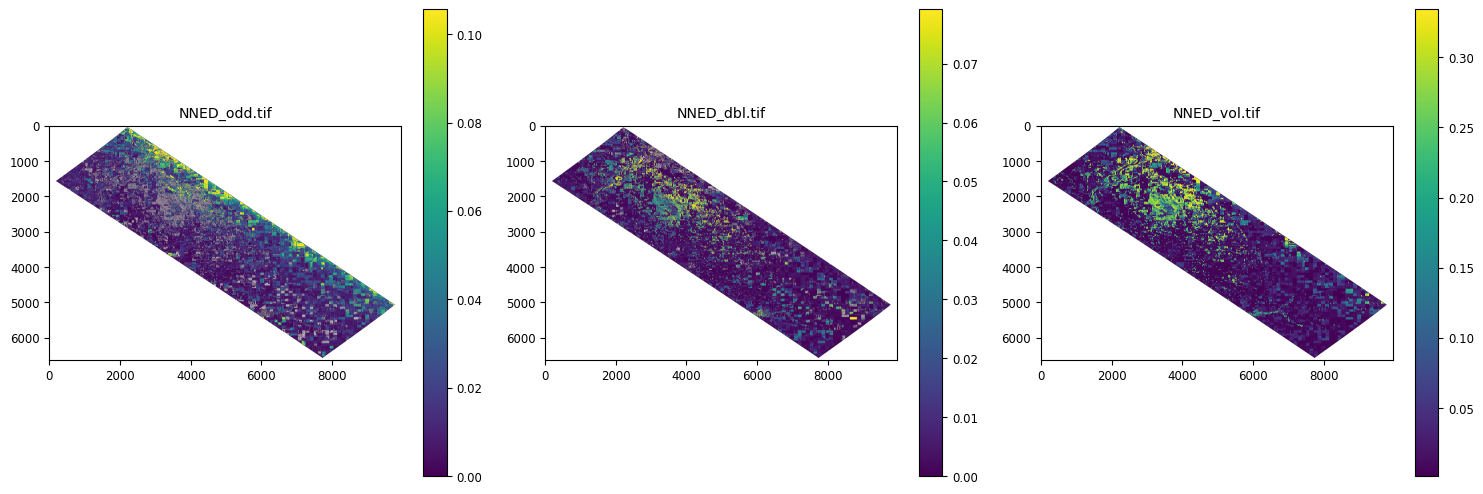

In [10]:
"""
The following function generates Non-negative eigen value decomposition demposition powers: 
        NNED_odd, NNED_dbl, NNED_vol in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.nned_fp(C3Folder,win=3) 

### Plotting
plot_images(os.path.join(C3Folder,'NNED_odd.tif'),
             os.path.join(C3Folder,'NNED_dbl.tif'),
              os.path.join(C3Folder,'NNED_vol.tif'))

## Shannon Entropy Parameters

Progress:   0%|          | 0/260 [00:00<?, ?block/s]

Progress:   0%|          | 1/260 [00:22<1:35:10, 22.05s/block]

Progress:   1%|          | 2/260 [00:22<40:03,  9.32s/block]  

Progress:   1%|          | 3/260 [00:22<22:33,  5.27s/block]

Progress:   2%|▏         | 4/260 [00:23<13:56,  3.27s/block]

Progress:   3%|▎         | 7/260 [00:23<05:14,  1.24s/block]

Progress:   3%|▎         | 9/260 [00:24<03:54,  1.07block/s]

Progress:   4%|▍         | 10/260 [00:24<03:15,  1.28block/s]

Progress:   4%|▍         | 11/260 [00:25<03:33,  1.17block/s]

Progress:   5%|▍         | 12/260 [00:25<02:56,  1.41block/s]

Progress:   5%|▌         | 13/260 [00:26<02:39,  1.55block/s]

Progress:   5%|▌         | 14/260 [00:26<02:03,  2.00block/s]

Progress:   6%|▌         | 15/260 [00:29<04:55,  1.21s/block]

Progress:   6%|▌         | 16/260 [00:29<04:08,  1.02s/block]

Progress:   7%|▋         | 17/260 [00:32<05:35,  1.38s/block]

Progress:   7%|▋         | 18/260 [00:32<04:23,  1.09s/block]

Progress:   7%|▋         | 19/260 [00:32<03:22,  1.19block/s]

Progress:   8%|▊         | 21/260 [00:32<02:00,  1.99block/s]

Progress:   9%|▉         | 23/260 [00:34<02:19,  1.70block/s]

Progress:   9%|▉         | 24/260 [00:34<02:00,  1.96block/s]

Progress:  10%|▉         | 25/260 [00:36<03:01,  1.29block/s]

Progress:  10%|█         | 26/260 [00:37<03:09,  1.24block/s]

Progress:  10%|█         | 27/260 [00:37<02:41,  1.45block/s]

Progress:  11%|█         | 29/260 [00:38<02:37,  1.46block/s]

Progress:  12%|█▏        | 30/260 [00:39<02:28,  1.55block/s]

Progress:  12%|█▏        | 31/260 [00:39<02:20,  1.63block/s]

Progress:  12%|█▏        | 32/260 [00:39<01:49,  2.09block/s]

Progress:  13%|█▎        | 35/260 [00:40<00:59,  3.77block/s]

Progress:  14%|█▍        | 36/260 [00:40<00:53,  4.20block/s]

Progress:  15%|█▍        | 38/260 [00:40<00:45,  4.83block/s]

Progress:  15%|█▌        | 39/260 [00:41<01:19,  2.79block/s]

Progress:  15%|█▌        | 40/260 [00:41<01:19,  2.76block/s]

Progress:  16%|█▌        | 41/260 [00:44<03:41,  1.01s/block]

Progress:  16%|█▌        | 42/260 [00:47<05:18,  1.46s/block]

Progress:  17%|█▋        | 43/260 [00:47<03:56,  1.09s/block]

Progress:  17%|█▋        | 44/260 [00:48<03:04,  1.17block/s]

Progress:  18%|█▊        | 46/260 [00:48<02:13,  1.60block/s]

Progress:  18%|█▊        | 47/260 [00:48<01:46,  2.00block/s]

Progress:  18%|█▊        | 48/260 [00:49<01:34,  2.25block/s]

Progress:  19%|█▉        | 49/260 [00:49<01:22,  2.55block/s]

Progress:  19%|█▉        | 50/260 [00:50<02:05,  1.67block/s]

Progress:  20%|█▉        | 51/260 [00:51<02:46,  1.26block/s]

Progress:  20%|██        | 53/260 [00:52<01:51,  1.86block/s]

Progress:  21%|██        | 54/260 [00:52<01:32,  2.22block/s]

Progress:  21%|██        | 55/260 [00:52<01:27,  2.33block/s]

Progress:  22%|██▏       | 56/260 [00:52<01:10,  2.90block/s]

Progress:  22%|██▏       | 57/260 [00:53<01:16,  2.64block/s]

Progress:  22%|██▏       | 58/260 [00:54<02:19,  1.45block/s]

Progress:  23%|██▎       | 59/260 [00:54<01:45,  1.90block/s]

Progress:  23%|██▎       | 60/260 [00:55<01:26,  2.33block/s]

Progress:  23%|██▎       | 61/260 [00:56<02:34,  1.29block/s]

Progress:  24%|██▍       | 62/260 [01:00<05:14,  1.59s/block]

Progress:  24%|██▍       | 63/260 [01:00<04:06,  1.25s/block]

Progress:  25%|██▍       | 64/260 [01:01<03:19,  1.02s/block]

Progress:  25%|██▌       | 65/260 [01:02<03:11,  1.02block/s]

Progress:  25%|██▌       | 66/260 [01:02<02:27,  1.32block/s]

Progress:  26%|██▌       | 67/260 [01:02<01:56,  1.65block/s]

Progress:  26%|██▌       | 68/260 [01:02<01:28,  2.16block/s]

Progress:  27%|██▋       | 69/260 [01:03<01:19,  2.41block/s]

Progress:  27%|██▋       | 70/260 [01:03<01:19,  2.40block/s]

Progress:  27%|██▋       | 71/260 [01:03<01:08,  2.76block/s]

Progress:  28%|██▊       | 72/260 [01:04<01:24,  2.21block/s]

Progress:  28%|██▊       | 73/260 [01:04<01:31,  2.03block/s]

Progress:  28%|██▊       | 74/260 [01:05<01:12,  2.58block/s]

Progress:  29%|██▉       | 75/260 [01:05<01:06,  2.79block/s]

Progress:  29%|██▉       | 76/260 [01:05<01:04,  2.87block/s]

Progress:  30%|██▉       | 77/260 [01:05<00:53,  3.43block/s]

Progress:  30%|███       | 78/260 [01:07<02:25,  1.25block/s]

Progress:  30%|███       | 79/260 [01:08<02:03,  1.46block/s]

Progress:  31%|███       | 80/260 [01:08<01:46,  1.70block/s]

Progress:  31%|███       | 81/260 [01:09<02:18,  1.29block/s]

Progress:  32%|███▏      | 82/260 [01:10<02:01,  1.47block/s]

Progress:  32%|███▏      | 83/260 [01:13<04:03,  1.38s/block]

Progress:  32%|███▏      | 84/260 [01:14<04:20,  1.48s/block]

Progress:  33%|███▎      | 85/260 [01:15<03:14,  1.11s/block]

Progress:  33%|███▎      | 86/260 [01:15<02:32,  1.14block/s]

Progress:  33%|███▎      | 87/260 [01:16<02:31,  1.14block/s]

Progress:  34%|███▍      | 88/260 [01:16<01:56,  1.48block/s]

Progress:  34%|███▍      | 89/260 [01:17<02:09,  1.32block/s]

Progress:  35%|███▌      | 91/260 [01:17<01:14,  2.26block/s]

Progress:  36%|███▌      | 94/260 [01:18<00:58,  2.82block/s]

Progress:  37%|███▋      | 96/260 [01:18<00:46,  3.50block/s]

Progress:  38%|███▊      | 98/260 [01:19<00:40,  3.97block/s]

Progress:  38%|███▊      | 99/260 [01:20<01:19,  2.02block/s]

Progress:  38%|███▊      | 100/260 [01:22<02:00,  1.33block/s]

Progress:  39%|███▉      | 101/260 [01:23<01:54,  1.39block/s]

Progress:  39%|███▉      | 102/260 [01:24<02:19,  1.13block/s]

Progress:  40%|████      | 104/260 [01:26<02:14,  1.16block/s]

Progress:  40%|████      | 105/260 [01:28<03:18,  1.28s/block]

Progress:  41%|████      | 106/260 [01:29<03:11,  1.24s/block]

Progress:  41%|████      | 107/260 [01:30<02:45,  1.08s/block]

Progress:  42%|████▏     | 108/260 [01:30<02:16,  1.11block/s]

Progress:  42%|████▏     | 109/260 [01:31<01:51,  1.36block/s]

Progress:  42%|████▏     | 110/260 [01:32<01:54,  1.30block/s]

Progress:  43%|████▎     | 112/260 [01:32<01:06,  2.22block/s]

Progress:  44%|████▍     | 114/260 [01:32<00:43,  3.35block/s]

Progress:  44%|████▍     | 115/260 [01:32<00:37,  3.84block/s]

Progress:  45%|████▌     | 117/260 [01:32<00:26,  5.41block/s]

Progress:  46%|████▌     | 119/260 [01:33<00:27,  5.20block/s]

Progress:  46%|████▌     | 120/260 [01:34<01:06,  2.09block/s]

Progress:  47%|████▋     | 121/260 [01:45<06:28,  2.79s/block]

Progress:  47%|████▋     | 122/260 [01:45<05:05,  2.21s/block]

Progress:  47%|████▋     | 123/260 [01:46<03:52,  1.70s/block]

Progress:  48%|████▊     | 124/260 [01:47<03:38,  1.61s/block]

Progress:  48%|████▊     | 125/260 [01:49<03:34,  1.59s/block]

Progress:  48%|████▊     | 126/260 [01:55<06:21,  2.85s/block]

Progress:  49%|████▉     | 127/260 [01:56<05:09,  2.33s/block]

Progress:  49%|████▉     | 128/260 [01:58<04:57,  2.25s/block]

Progress:  50%|████▉     | 129/260 [02:02<06:28,  2.96s/block]

Progress:  50%|█████     | 130/260 [02:03<04:49,  2.23s/block]

Progress:  51%|█████     | 132/260 [02:03<02:44,  1.29s/block]

Progress:  51%|█████     | 133/260 [02:04<02:15,  1.06s/block]

Progress:  52%|█████▏    | 134/260 [02:04<01:48,  1.16block/s]

Progress:  52%|█████▏    | 136/260 [02:04<01:12,  1.70block/s]

Progress:  53%|█████▎    | 137/260 [02:04<00:58,  2.11block/s]

Progress:  53%|█████▎    | 139/260 [02:05<00:47,  2.57block/s]

Progress:  54%|█████▍    | 141/260 [02:12<02:53,  1.45s/block]

Progress:  55%|█████▍    | 142/260 [02:12<02:27,  1.25s/block]

Progress:  55%|█████▌    | 143/260 [02:14<02:58,  1.53s/block]

Progress:  55%|█████▌    | 144/260 [02:19<04:16,  2.21s/block]

Progress:  56%|█████▌    | 145/260 [02:20<03:36,  1.88s/block]

Progress:  56%|█████▌    | 146/260 [02:20<02:54,  1.53s/block]

Progress:  57%|█████▋    | 147/260 [02:24<04:04,  2.16s/block]

Progress:  57%|█████▋    | 148/260 [02:29<05:42,  3.06s/block]

Progress:  57%|█████▋    | 149/260 [02:30<04:15,  2.30s/block]

Progress:  58%|█████▊    | 150/260 [02:30<03:11,  1.74s/block]

Progress:  58%|█████▊    | 151/260 [02:31<02:35,  1.43s/block]

Progress:  58%|█████▊    | 152/260 [02:33<02:53,  1.61s/block]

Progress:  59%|█████▉    | 153/260 [02:34<02:31,  1.42s/block]

Progress:  60%|█████▉    | 155/260 [02:34<01:31,  1.14block/s]

Progress:  60%|██████    | 156/260 [02:36<01:47,  1.03s/block]

Progress:  60%|██████    | 157/260 [02:36<01:25,  1.20block/s]

Progress:  61%|██████    | 158/260 [02:36<01:06,  1.54block/s]

Progress:  62%|██████▏   | 160/260 [02:37<00:55,  1.82block/s]

Progress:  62%|██████▏   | 161/260 [02:38<01:05,  1.52block/s]

Progress:  62%|██████▏   | 162/260 [02:41<01:57,  1.20s/block]

Progress:  63%|██████▎   | 163/260 [02:46<03:30,  2.17s/block]

Progress:  63%|██████▎   | 165/260 [02:47<02:11,  1.39s/block]

Progress:  64%|██████▍   | 166/260 [02:48<02:06,  1.35s/block]

Progress:  64%|██████▍   | 167/260 [02:50<02:24,  1.55s/block]

Progress:  65%|██████▌   | 169/260 [02:55<03:07,  2.06s/block]

Progress:  65%|██████▌   | 170/260 [02:56<02:32,  1.70s/block]

Progress:  66%|██████▌   | 171/260 [03:03<04:26,  2.99s/block]

Progress:  66%|██████▌   | 172/260 [03:04<03:31,  2.40s/block]

Progress:  67%|██████▋   | 173/260 [03:05<02:57,  2.04s/block]

Progress:  67%|██████▋   | 174/260 [03:06<02:31,  1.76s/block]

Progress:  67%|██████▋   | 175/260 [03:06<01:54,  1.34s/block]

Progress:  68%|██████▊   | 176/260 [03:07<01:33,  1.11s/block]

Progress:  68%|██████▊   | 178/260 [03:07<00:56,  1.46block/s]

Progress:  69%|██████▉   | 179/260 [03:07<00:44,  1.83block/s]

Progress:  69%|██████▉   | 180/260 [03:07<00:39,  2.03block/s]

Progress:  70%|██████▉   | 181/260 [03:09<01:11,  1.11block/s]

Progress:  70%|███████   | 182/260 [03:10<00:57,  1.37block/s]

Progress:  70%|███████   | 183/260 [03:11<01:17,  1.00s/block]

Progress:  71%|███████   | 184/260 [03:13<01:39,  1.31s/block]

Progress:  71%|███████   | 185/260 [03:15<01:35,  1.28s/block]

Progress:  72%|███████▏  | 186/260 [03:19<02:37,  2.13s/block]

Progress:  72%|███████▏  | 187/260 [03:21<02:29,  2.05s/block]

Progress:  73%|███████▎  | 189/260 [03:22<01:44,  1.47s/block]

Progress:  73%|███████▎  | 190/260 [03:24<01:47,  1.53s/block]

Progress:  73%|███████▎  | 191/260 [03:24<01:20,  1.16s/block]

Progress:  74%|███████▍  | 192/260 [03:34<03:53,  3.43s/block]

Progress:  74%|███████▍  | 193/260 [03:36<03:39,  3.28s/block]

Progress:  75%|███████▍  | 194/260 [03:37<02:41,  2.45s/block]

Progress:  75%|███████▌  | 195/260 [03:37<01:56,  1.80s/block]

Progress:  76%|███████▌  | 197/260 [03:37<01:04,  1.03s/block]

Progress:  76%|███████▌  | 198/260 [03:38<00:59,  1.05block/s]

Progress:  77%|███████▋  | 199/260 [03:38<00:45,  1.33block/s]

Progress:  77%|███████▋  | 201/260 [03:39<00:33,  1.77block/s]

Progress:  78%|███████▊  | 202/260 [03:40<00:38,  1.52block/s]

Progress:  78%|███████▊  | 203/260 [03:40<00:36,  1.55block/s]

Progress:  79%|███████▉  | 205/260 [03:41<00:33,  1.62block/s]

Progress:  79%|███████▉  | 206/260 [03:44<00:56,  1.04s/block]

Progress:  80%|███████▉  | 207/260 [03:49<01:54,  2.15s/block]

Progress:  80%|████████  | 208/260 [03:50<01:25,  1.65s/block]

Progress:  80%|████████  | 209/260 [03:52<01:38,  1.93s/block]

Progress:  81%|████████  | 210/260 [03:53<01:14,  1.48s/block]

Progress:  81%|████████  | 211/260 [03:53<00:56,  1.15s/block]

Progress:  82%|████████▏ | 212/260 [03:53<00:45,  1.06block/s]

Progress:  82%|████████▏ | 213/260 [04:00<01:58,  2.52s/block]

Progress:  82%|████████▏ | 214/260 [04:00<01:23,  1.81s/block]

Progress:  83%|████████▎ | 215/260 [04:02<01:22,  1.83s/block]

Progress:  83%|████████▎ | 216/260 [04:05<01:43,  2.35s/block]

Progress:  83%|████████▎ | 217/260 [04:05<01:12,  1.70s/block]

Progress:  84%|████████▍ | 218/260 [04:06<00:53,  1.27s/block]

Progress:  84%|████████▍ | 219/260 [04:06<00:41,  1.01s/block]

Progress:  85%|████████▍ | 220/260 [04:08<00:44,  1.12s/block]

Progress:  85%|████████▌ | 221/260 [04:08<00:35,  1.09block/s]

Progress:  86%|████████▌ | 223/260 [04:09<00:23,  1.58block/s]

Progress:  86%|████████▌ | 224/260 [04:09<00:18,  1.92block/s]

Progress:  87%|████████▋ | 225/260 [04:09<00:17,  1.98block/s]

Progress:  87%|████████▋ | 226/260 [04:10<00:21,  1.59block/s]

Progress:  88%|████████▊ | 228/260 [04:15<00:48,  1.52s/block]

Progress:  88%|████████▊ | 229/260 [04:17<00:45,  1.48s/block]

Progress:  88%|████████▊ | 230/260 [04:18<00:40,  1.36s/block]

Progress:  89%|████████▉ | 231/260 [04:18<00:32,  1.11s/block]

Progress:  89%|████████▉ | 232/260 [04:21<00:43,  1.54s/block]

Progress:  90%|████████▉ | 233/260 [04:23<00:42,  1.56s/block]

Progress:  90%|█████████ | 234/260 [04:23<00:31,  1.21s/block]

Progress:  90%|█████████ | 235/260 [04:25<00:33,  1.33s/block]

Progress:  91%|█████████ | 236/260 [04:25<00:29,  1.22s/block]

Progress:  91%|█████████ | 237/260 [04:26<00:24,  1.07s/block]

Progress:  92%|█████████▏| 238/260 [04:27<00:20,  1.10block/s]

Progress:  92%|█████████▏| 239/260 [04:29<00:25,  1.20s/block]

Progress:  92%|█████████▏| 240/260 [04:29<00:18,  1.07block/s]

Progress:  93%|█████████▎| 241/260 [04:29<00:14,  1.28block/s]

Progress:  93%|█████████▎| 242/260 [04:30<00:12,  1.50block/s]

Progress:  93%|█████████▎| 243/260 [04:30<00:10,  1.66block/s]

Progress:  94%|█████████▍| 244/260 [04:30<00:07,  2.17block/s]

Progress:  94%|█████████▍| 245/260 [04:31<00:09,  1.62block/s]

Progress:  95%|█████████▍| 246/260 [04:32<00:06,  2.00block/s]

Progress:  95%|█████████▌| 247/260 [04:32<00:05,  2.34block/s]

Progress:  96%|█████████▌| 249/260 [04:32<00:03,  3.18block/s]

Progress:  96%|█████████▌| 250/260 [04:33<00:03,  2.81block/s]

Progress:  97%|█████████▋| 251/260 [04:33<00:03,  2.52block/s]

Progress:  97%|█████████▋| 252/260 [04:34<00:03,  2.55block/s]

Progress:  98%|█████████▊| 254/260 [04:34<00:02,  2.85block/s]

Progress:  98%|█████████▊| 255/260 [04:35<00:01,  2.55block/s]

Progress:  98%|█████████▊| 256/260 [04:36<00:02,  1.97block/s]

Progress: 100%|█████████▉| 259/260 [04:36<00:00,  2.48block/s]

Progress: 100%|██████████| 260/260 [04:37<00:00,  2.41block/s]

Progress: 100%|██████████| 260/260 [04:37<00:00,  1.07s/block]

Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\H_Shannon.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\HI_Shannon.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\HP_Shannon.tif


Execution time for shannon_h_fp: 04:48 (min:sec)


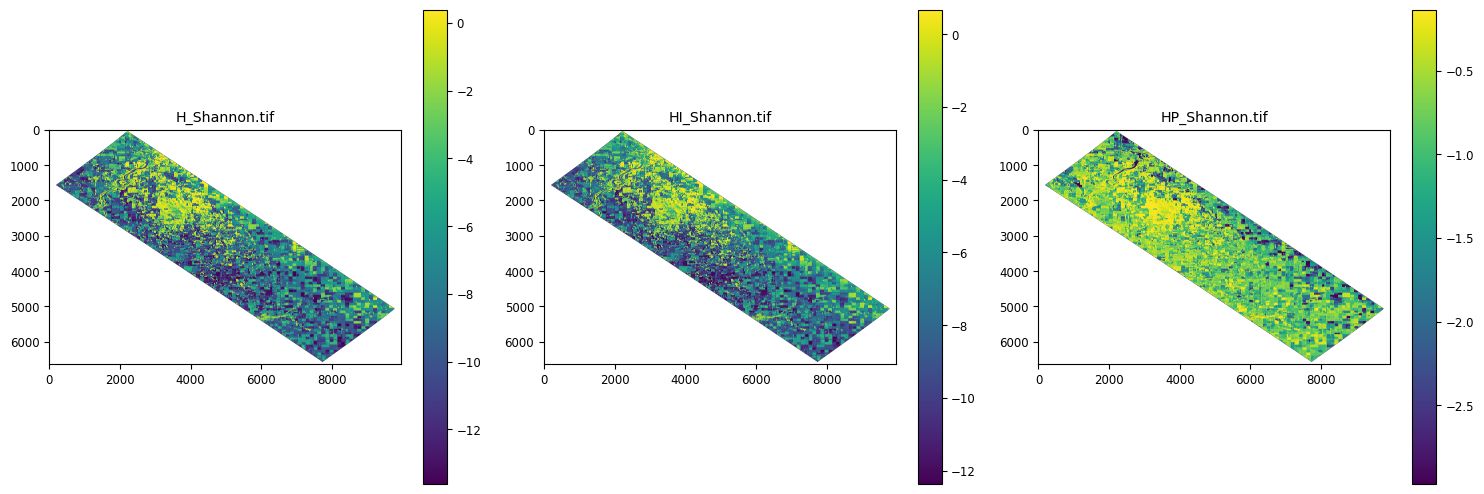

In [11]:

"""
The following function generates Shannon entropy parameters: 
        H_Shannon, HI_Shannon, and HP_Shannon in geotif format

input C3/T3 folder path, window_size is optional  

"""


pst.shannon_h_fp(C3Folder,win=3) 
### Plotting
plot_images(os.path.join(C3Folder,'H_Shannon.tif'),
             os.path.join(C3Folder,'HI_Shannon.tif'),
              os.path.join(C3Folder,'HP_Shannon.tif'))

## Yamaguchi 4-component decomposition

Progress:   0%|          | 0/260 [00:00<?, ?block/s]

Progress:   0%|          | 1/260 [00:26<1:54:07, 26.44s/block]

Progress:   1%|          | 2/260 [00:29<55:35, 12.93s/block]  

Progress:   1%|          | 3/260 [00:31<33:24,  7.80s/block]

Progress:   2%|▏         | 4/260 [00:36<28:07,  6.59s/block]

Progress:   2%|▏         | 5/260 [00:36<18:11,  4.28s/block]

Progress:   2%|▏         | 6/260 [00:36<12:17,  2.90s/block]

Progress:   3%|▎         | 7/260 [00:37<08:41,  2.06s/block]

Progress:   3%|▎         | 9/260 [00:38<05:55,  1.42s/block]

Progress:   4%|▍         | 11/260 [00:39<04:08,  1.00block/s]

Progress:   5%|▍         | 12/260 [00:39<03:27,  1.19block/s]

Progress:   5%|▌         | 13/260 [00:40<03:02,  1.36block/s]

Progress:   5%|▌         | 14/260 [00:47<09:54,  2.42s/block]

Progress:   6%|▌         | 15/260 [01:06<28:23,  6.95s/block]

Progress:   6%|▌         | 16/260 [01:18<33:50,  8.32s/block]

Progress:   7%|▋         | 17/260 [01:26<33:19,  8.23s/block]

Progress:   7%|▋         | 18/260 [01:34<33:00,  8.18s/block]

Progress:   7%|▋         | 19/260 [01:34<23:52,  5.94s/block]

Progress:   8%|▊         | 20/260 [01:35<17:13,  4.31s/block]

Progress:   8%|▊         | 21/260 [01:37<14:30,  3.64s/block]

Progress:   8%|▊         | 22/260 [01:38<11:34,  2.92s/block]

Progress:   9%|▉         | 23/260 [01:39<09:36,  2.43s/block]

Progress:   9%|▉         | 24/260 [01:46<14:02,  3.57s/block]

Progress:  10%|▉         | 25/260 [01:57<22:53,  5.85s/block]

Progress:  10%|█         | 26/260 [02:05<25:33,  6.56s/block]

Progress:  10%|█         | 27/260 [02:07<19:51,  5.12s/block]

Progress:  11%|█         | 28/260 [02:14<22:34,  5.84s/block]

Progress:  11%|█         | 29/260 [02:24<27:23,  7.12s/block]

Progress:  12%|█▏        | 30/260 [02:27<22:16,  5.81s/block]

Progress:  12%|█▏        | 31/260 [02:32<21:31,  5.64s/block]

Progress:  12%|█▏        | 32/260 [02:33<15:14,  4.01s/block]

Progress:  13%|█▎        | 33/260 [02:36<14:45,  3.90s/block]

Progress:  13%|█▎        | 34/260 [02:38<11:57,  3.18s/block]

Progress:  13%|█▎        | 35/260 [02:38<08:42,  2.32s/block]

Progress:  14%|█▍        | 36/260 [02:38<06:30,  1.74s/block]

Progress:  14%|█▍        | 37/260 [02:39<04:50,  1.30s/block]

Progress:  15%|█▍        | 38/260 [02:40<04:48,  1.30s/block]

Progress:  15%|█▌        | 39/260 [02:42<04:59,  1.35s/block]

Progress:  15%|█▌        | 40/260 [02:46<08:21,  2.28s/block]

Progress:  16%|█▌        | 41/260 [03:04<25:52,  7.09s/block]

Progress:  16%|█▌        | 42/260 [03:21<35:58,  9.90s/block]

Progress:  17%|█▋        | 43/260 [03:22<26:02,  7.20s/block]

Progress:  17%|█▋        | 44/260 [03:22<18:16,  5.08s/block]

Progress:  17%|█▋        | 45/260 [03:23<13:37,  3.80s/block]

Progress:  18%|█▊        | 46/260 [03:23<09:53,  2.77s/block]

Progress:  18%|█▊        | 47/260 [03:26<10:06,  2.85s/block]

Progress:  18%|█▊        | 48/260 [03:26<07:28,  2.12s/block]

Progress:  19%|█▉        | 49/260 [03:28<06:43,  1.91s/block]

Progress:  19%|█▉        | 50/260 [03:36<13:19,  3.81s/block]

Progress:  20%|██        | 52/260 [03:45<14:04,  4.06s/block]

Progress:  20%|██        | 53/260 [03:46<11:57,  3.47s/block]

Progress:  21%|██        | 54/260 [03:48<10:05,  2.94s/block]

Progress:  21%|██        | 55/260 [03:49<08:23,  2.46s/block]

Progress:  22%|██▏       | 56/260 [03:50<06:42,  1.97s/block]

Progress:  22%|██▏       | 57/260 [03:50<05:07,  1.51s/block]

Progress:  22%|██▏       | 58/260 [04:05<17:55,  5.32s/block]

Progress:  23%|██▎       | 59/260 [04:05<12:46,  3.81s/block]

Progress:  23%|██▎       | 60/260 [04:05<09:27,  2.84s/block]

Progress:  23%|██▎       | 61/260 [04:17<18:00,  5.43s/block]

Progress:  24%|██▍       | 62/260 [04:54<48:52, 14.81s/block]

Progress:  24%|██▍       | 63/260 [04:57<37:18, 11.36s/block]

Progress:  25%|██▍       | 64/260 [04:59<27:17,  8.35s/block]

Progress:  25%|██▌       | 65/260 [05:00<20:30,  6.31s/block]

Progress:  25%|██▌       | 66/260 [05:02<16:07,  4.99s/block]

Progress:  26%|██▌       | 67/260 [05:03<12:39,  3.94s/block]

Progress:  26%|██▌       | 68/260 [05:05<10:09,  3.17s/block]

Progress:  27%|██▋       | 69/260 [05:05<07:32,  2.37s/block]

Progress:  27%|██▋       | 70/260 [05:07<06:49,  2.16s/block]

Progress:  27%|██▋       | 71/260 [05:08<05:35,  1.78s/block]

Progress:  28%|██▊       | 72/260 [05:19<14:33,  4.65s/block]

Progress:  28%|██▊       | 73/260 [05:20<10:28,  3.36s/block]

Progress:  28%|██▊       | 74/260 [05:24<11:18,  3.65s/block]

Progress:  29%|██▉       | 75/260 [05:29<12:09,  3.94s/block]

Progress:  30%|██▉       | 77/260 [05:35<11:00,  3.61s/block]

Progress:  30%|███       | 78/260 [05:39<11:01,  3.63s/block]

Progress:  30%|███       | 79/260 [05:46<14:13,  4.71s/block]

Progress:  31%|███       | 80/260 [05:49<12:03,  4.02s/block]

Progress:  31%|███       | 81/260 [05:57<15:39,  5.25s/block]

Progress:  32%|███▏      | 82/260 [06:01<14:39,  4.94s/block]

Progress:  32%|███▏      | 83/260 [06:19<25:27,  8.63s/block]

Progress:  32%|███▏      | 84/260 [06:24<22:42,  7.74s/block]

Progress:  33%|███▎      | 85/260 [06:27<18:31,  6.35s/block]

Progress:  33%|███▎      | 86/260 [06:29<13:50,  4.78s/block]

Progress:  33%|███▎      | 87/260 [06:30<10:51,  3.77s/block]

Progress:  34%|███▍      | 88/260 [06:39<14:57,  5.22s/block]

Progress:  34%|███▍      | 89/260 [06:40<11:23,  3.99s/block]

Progress:  35%|███▍      | 90/260 [06:42<09:42,  3.42s/block]

Progress:  35%|███▌      | 91/260 [06:45<09:31,  3.38s/block]

Progress:  36%|███▌      | 93/260 [06:48<07:14,  2.60s/block]

Progress:  36%|███▌      | 94/260 [06:55<10:10,  3.68s/block]

Progress:  37%|███▋      | 95/260 [06:57<08:28,  3.08s/block]

Progress:  37%|███▋      | 96/260 [06:57<06:13,  2.27s/block]

Progress:  37%|███▋      | 97/260 [07:03<08:52,  3.27s/block]

Progress:  38%|███▊      | 98/260 [07:08<10:04,  3.73s/block]

Progress:  38%|███▊      | 100/260 [07:20<13:08,  4.93s/block]

Progress:  39%|███▉      | 101/260 [07:31<16:47,  6.34s/block]

Progress:  39%|███▉      | 102/260 [07:32<12:50,  4.88s/block]

Progress:  40%|███▉      | 103/260 [07:36<11:59,  4.58s/block]

Progress:  40%|████      | 104/260 [07:40<11:34,  4.45s/block]

Progress:  40%|████      | 105/260 [07:54<18:54,  7.32s/block]

Progress:  41%|████      | 106/260 [08:09<24:11,  9.42s/block]

Progress:  41%|████      | 107/260 [08:10<18:05,  7.09s/block]

Progress:  42%|████▏     | 108/260 [08:16<17:17,  6.83s/block]

Progress:  42%|████▏     | 109/260 [08:22<16:00,  6.36s/block]

Progress:  42%|████▏     | 110/260 [08:32<19:02,  7.61s/block]

Progress:  43%|████▎     | 111/260 [08:33<13:27,  5.42s/block]

Progress:  43%|████▎     | 112/260 [08:33<09:32,  3.87s/block]

Progress:  43%|████▎     | 113/260 [08:33<07:09,  2.92s/block]

Progress:  44%|████▍     | 114/260 [08:34<05:06,  2.10s/block]

Progress:  45%|████▍     | 116/260 [08:36<03:51,  1.61s/block]

Progress:  45%|████▌     | 117/260 [08:38<04:25,  1.86s/block]

Progress:  45%|████▌     | 118/260 [08:41<04:37,  1.96s/block]

Progress:  46%|████▌     | 119/260 [08:43<04:40,  1.99s/block]

Progress:  46%|████▌     | 120/260 [08:43<03:38,  1.56s/block]

Progress:  47%|████▋     | 121/260 [08:55<10:43,  4.63s/block]

Progress:  47%|████▋     | 122/260 [08:57<08:34,  3.73s/block]

Progress:  47%|████▋     | 123/260 [09:09<13:58,  6.12s/block]

Progress:  48%|████▊     | 124/260 [09:14<13:10,  5.82s/block]

Progress:  48%|████▊     | 125/260 [09:22<14:52,  6.61s/block]

Progress:  48%|████▊     | 126/260 [09:46<26:17, 11.77s/block]

Progress:  49%|████▉     | 127/260 [09:51<21:12,  9.57s/block]

Progress:  49%|████▉     | 128/260 [09:51<15:02,  6.83s/block]

Progress:  50%|████▉     | 129/260 [09:54<12:13,  5.60s/block]

Progress:  50%|█████     | 130/260 [09:54<08:50,  4.08s/block]

Progress:  50%|█████     | 131/260 [10:00<10:00,  4.65s/block]

Progress:  51%|█████     | 132/260 [10:01<07:36,  3.57s/block]

Progress:  51%|█████     | 133/260 [10:02<05:29,  2.60s/block]

Progress:  52%|█████▏    | 134/260 [10:03<04:43,  2.25s/block]

Progress:  52%|█████▏    | 135/260 [10:06<04:58,  2.39s/block]

Progress:  52%|█████▏    | 136/260 [10:06<03:33,  1.72s/block]

Progress:  53%|█████▎    | 138/260 [10:08<02:36,  1.28s/block]

Progress:  53%|█████▎    | 139/260 [10:13<04:27,  2.21s/block]

Progress:  54%|█████▍    | 140/260 [10:17<05:30,  2.76s/block]

Progress:  54%|█████▍    | 141/260 [10:31<11:41,  5.90s/block]

Progress:  55%|█████▍    | 142/260 [10:33<09:08,  4.64s/block]

Progress:  55%|█████▌    | 143/260 [10:37<09:09,  4.70s/block]

Progress:  55%|█████▌    | 144/260 [10:42<08:48,  4.55s/block]

Progress:  56%|█████▌    | 145/260 [10:45<08:12,  4.29s/block]

Progress:  56%|█████▌    | 146/260 [10:53<10:02,  5.28s/block]

Progress:  57%|█████▋    | 147/260 [11:04<13:01,  6.92s/block]

Progress:  57%|█████▋    | 148/260 [11:14<14:50,  7.95s/block]

Progress:  57%|█████▋    | 149/260 [11:27<17:32,  9.48s/block]

Progress:  58%|█████▊    | 150/260 [11:28<12:40,  6.91s/block]

Progress:  58%|█████▊    | 151/260 [11:30<09:55,  5.46s/block]

Progress:  58%|█████▊    | 152/260 [11:31<07:09,  3.98s/block]

Progress:  59%|█████▉    | 153/260 [11:36<08:01,  4.50s/block]

Progress:  59%|█████▉    | 154/260 [11:41<07:44,  4.38s/block]

Progress:  60%|█████▉    | 155/260 [11:42<06:21,  3.63s/block]

Progress:  60%|██████    | 156/260 [11:44<05:03,  2.92s/block]

Progress:  60%|██████    | 157/260 [11:45<04:01,  2.35s/block]

Progress:  61%|██████    | 158/260 [11:48<04:41,  2.76s/block]

Progress:  61%|██████    | 159/260 [11:49<03:46,  2.24s/block]

Progress:  62%|██████▏   | 160/260 [11:50<02:50,  1.71s/block]

Progress:  62%|██████▏   | 161/260 [11:56<04:59,  3.03s/block]

Progress:  62%|██████▏   | 162/260 [12:00<05:24,  3.31s/block]

Progress:  63%|██████▎   | 163/260 [12:01<04:10,  2.58s/block]

Progress:  63%|██████▎   | 164/260 [12:22<13:08,  8.21s/block]

Progress:  63%|██████▎   | 165/260 [12:26<10:41,  6.75s/block]

Progress:  64%|██████▍   | 166/260 [12:30<09:30,  6.07s/block]

Progress:  64%|██████▍   | 167/260 [12:32<07:27,  4.81s/block]

Progress:  65%|██████▍   | 168/260 [12:41<09:33,  6.23s/block]

Progress:  65%|██████▌   | 169/260 [12:48<09:27,  6.24s/block]

Progress:  65%|██████▌   | 170/260 [13:00<11:52,  7.92s/block]

Progress:  66%|██████▌   | 171/260 [13:05<10:43,  7.23s/block]

Progress:  66%|██████▌   | 172/260 [13:09<09:04,  6.18s/block]

Progress:  67%|██████▋   | 173/260 [13:16<09:25,  6.51s/block]

Progress:  67%|██████▋   | 174/260 [13:23<09:39,  6.74s/block]

Progress:  67%|██████▋   | 175/260 [13:27<08:17,  5.85s/block]

Progress:  68%|██████▊   | 176/260 [13:34<08:31,  6.09s/block]

Progress:  68%|██████▊   | 177/260 [13:36<06:42,  4.85s/block]

Progress:  68%|██████▊   | 178/260 [13:36<04:47,  3.51s/block]

Progress:  69%|██████▉   | 179/260 [13:40<04:53,  3.62s/block]

Progress:  69%|██████▉   | 180/260 [13:42<03:58,  2.98s/block]

Progress:  70%|██████▉   | 181/260 [13:42<02:51,  2.17s/block]

Progress:  70%|███████   | 182/260 [13:44<02:37,  2.01s/block]

Progress:  70%|███████   | 183/260 [13:44<02:02,  1.60s/block]

Progress:  71%|███████   | 184/260 [13:48<02:49,  2.23s/block]

Progress:  71%|███████   | 185/260 [13:54<04:16,  3.42s/block]

Progress:  72%|███████▏  | 186/260 [13:59<04:54,  3.98s/block]

Progress:  72%|███████▏  | 187/260 [14:02<04:28,  3.68s/block]

Progress:  72%|███████▏  | 188/260 [14:05<04:00,  3.34s/block]

Progress:  73%|███████▎  | 189/260 [14:10<04:42,  3.98s/block]

Progress:  73%|███████▎  | 190/260 [14:11<03:34,  3.07s/block]

Progress:  73%|███████▎  | 191/260 [14:19<05:00,  4.35s/block]

Progress:  74%|███████▍  | 192/260 [14:56<16:12, 14.30s/block]

Progress:  74%|███████▍  | 193/260 [15:01<12:46, 11.44s/block]

Progress:  75%|███████▍  | 194/260 [15:03<09:37,  8.75s/block]

Progress:  75%|███████▌  | 195/260 [15:04<06:41,  6.17s/block]

Progress:  75%|███████▌  | 196/260 [15:05<05:13,  4.89s/block]

Progress:  76%|███████▌  | 197/260 [15:09<04:42,  4.48s/block]

Progress:  76%|███████▌  | 198/260 [15:09<03:20,  3.24s/block]

Progress:  77%|███████▋  | 199/260 [15:10<02:23,  2.36s/block]

Progress:  77%|███████▋  | 200/260 [15:12<02:22,  2.38s/block]

Progress:  77%|███████▋  | 201/260 [15:13<02:01,  2.06s/block]

Progress:  78%|███████▊  | 202/260 [15:15<01:58,  2.04s/block]

Progress:  78%|███████▊  | 203/260 [15:16<01:33,  1.64s/block]

Progress:  79%|███████▉  | 205/260 [15:17<01:03,  1.16s/block]

Progress:  79%|███████▉  | 206/260 [15:23<01:59,  2.21s/block]

Progress:  80%|███████▉  | 207/260 [15:35<04:18,  4.88s/block]

Progress:  80%|████████  | 208/260 [15:37<03:34,  4.13s/block]

Progress:  80%|████████  | 209/260 [15:40<03:07,  3.69s/block]

Progress:  81%|████████  | 210/260 [15:44<03:06,  3.74s/block]

Progress:  81%|████████  | 211/260 [15:45<02:25,  2.97s/block]

Progress:  82%|████████▏ | 212/260 [15:47<02:13,  2.78s/block]

Progress:  82%|████████▏ | 213/260 [16:16<08:14, 10.51s/block]

Progress:  82%|████████▏ | 214/260 [16:18<06:01,  7.86s/block]

Progress:  83%|████████▎ | 215/260 [16:25<05:48,  7.75s/block]

Progress:  83%|████████▎ | 216/260 [16:33<05:38,  7.68s/block]

Progress:  83%|████████▎ | 217/260 [16:34<04:06,  5.74s/block]

Progress:  84%|████████▍ | 218/260 [16:37<03:34,  5.12s/block]

Progress:  84%|████████▍ | 219/260 [16:42<03:21,  4.92s/block]

Progress:  85%|████████▍ | 220/260 [16:43<02:26,  3.66s/block]

Progress:  85%|████████▌ | 221/260 [16:43<01:41,  2.61s/block]

Progress:  85%|████████▌ | 222/260 [16:43<01:15,  2.00s/block]

Progress:  86%|████████▌ | 223/260 [16:46<01:16,  2.06s/block]

Progress:  86%|████████▌ | 224/260 [16:47<01:06,  1.86s/block]

Progress:  87%|████████▋ | 225/260 [16:49<01:06,  1.89s/block]

Progress:  87%|████████▋ | 226/260 [16:50<00:54,  1.60s/block]

Progress:  87%|████████▋ | 227/260 [16:51<00:45,  1.38s/block]

Progress:  88%|████████▊ | 228/260 [16:57<01:35,  2.97s/block]

Progress:  88%|████████▊ | 229/260 [17:01<01:35,  3.08s/block]

Progress:  88%|████████▊ | 230/260 [17:06<01:56,  3.87s/block]

Progress:  89%|████████▉ | 231/260 [17:10<01:54,  3.94s/block]

Progress:  89%|████████▉ | 232/260 [17:15<01:52,  4.03s/block]

Progress:  90%|████████▉ | 233/260 [17:16<01:24,  3.13s/block]

Progress:  90%|█████████ | 234/260 [17:35<03:30,  8.08s/block]

Progress:  90%|█████████ | 235/260 [17:39<02:46,  6.66s/block]

Progress:  91%|█████████ | 236/260 [17:40<02:00,  5.04s/block]

Progress:  91%|█████████ | 237/260 [17:42<01:35,  4.13s/block]

Progress:  92%|█████████▏| 238/260 [17:48<01:43,  4.68s/block]

Progress:  92%|█████████▏| 239/260 [17:51<01:29,  4.24s/block]

Progress:  92%|█████████▏| 240/260 [17:53<01:12,  3.64s/block]

Progress:  93%|█████████▎| 241/260 [18:00<01:25,  4.48s/block]

Progress:  93%|█████████▎| 242/260 [18:06<01:29,  4.99s/block]

Progress:  93%|█████████▎| 243/260 [18:07<01:04,  3.77s/block]

Progress:  94%|█████████▍| 244/260 [18:11<01:00,  3.78s/block]

Progress:  94%|█████████▍| 245/260 [18:11<00:42,  2.81s/block]

Progress:  95%|█████████▍| 246/260 [18:14<00:37,  2.71s/block]

Progress:  95%|█████████▌| 247/260 [18:17<00:36,  2.77s/block]

Progress:  95%|█████████▌| 248/260 [18:18<00:27,  2.32s/block]

Progress:  96%|█████████▌| 249/260 [18:19<00:19,  1.82s/block]

Progress:  96%|█████████▌| 250/260 [18:21<00:20,  2.07s/block]

Progress:  97%|█████████▋| 251/260 [18:23<00:17,  1.97s/block]

Progress:  97%|█████████▋| 252/260 [18:24<00:13,  1.66s/block]

Progress:  97%|█████████▋| 253/260 [18:29<00:19,  2.79s/block]

Progress:  98%|█████████▊| 255/260 [18:32<00:10,  2.19s/block]

Progress:  98%|█████████▊| 256/260 [18:41<00:15,  3.76s/block]

Progress:  99%|█████████▉| 257/260 [18:41<00:08,  2.85s/block]

Progress:  99%|█████████▉| 258/260 [18:42<00:04,  2.35s/block]

Progress: 100%|█████████▉| 259/260 [18:43<00:01,  1.83s/block]

Progress: 100%|██████████| 260/260 [18:49<00:00,  3.08s/block]

Progress: 100%|██████████| 260/260 [18:49<00:00,  4.34s/block]

Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\Yam4co_odd.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\Yam4co_dbl.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\Yam4co_vol.tif


Saved file ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\Yam4co_hlx.tif


Execution time for yam4c_fp: 19:18 (min:sec)


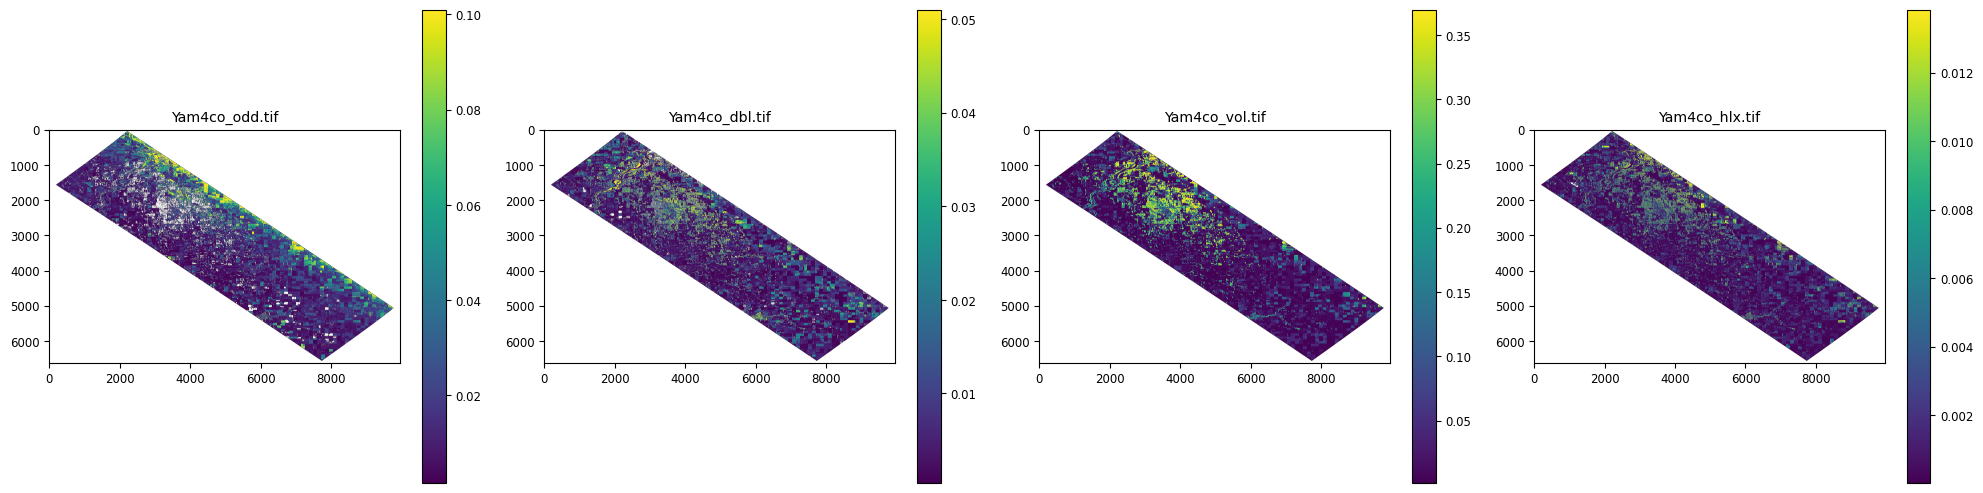

In [12]:
"""
The following function generates Yamaguchi 4-Component Decomposition parameters: 
        Yam4co_odd, Yam4co_dbl, Yam4co_vol and Yam4co_hlx in geotif format

input C3/T3 folder path, window_size is optional  

"""

pst.yam4c_fp(C3Folder, 
            win=3,
            # model='y4co',# default is y4co, you may choose 'y4cr' or 'y4cs'
            
           )

plot_images(os.path.join(C3Folder,'Yam4co_odd.tif'),
             os.path.join(C3Folder,'Yam4co_dbl.tif'),
             os.path.join(C3Folder,'Yam4co_vol.tif'),
           os.path.join(C3Folder,'Yam4co_hlx.tif')
           )

RGB image saved as ../data/UAVSAR/winnip_31606_12049_004_120627_L090_CX_03_grd\rlee_3x3\C3\RGB.png
Execution time for rgb: 23.00 seconds


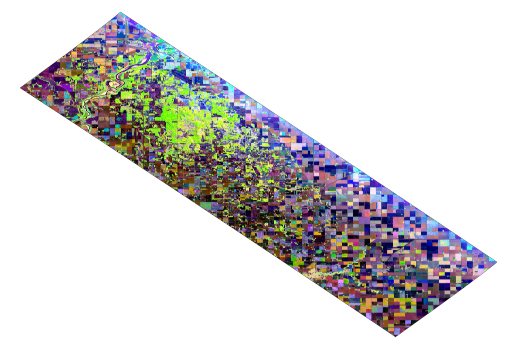

In [13]:
blue = os.path.join(C3Folder,'Yam4co_odd.tif')
red = os.path.join(C3Folder,'Yam4co_dbl.tif')
green = os.path.join(C3Folder,'Yam4co_vol.tif')

pst.rgb(red,green,blue)
